In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [256]:
from sklearn.preprocessing import StandardScaler # for preprocessing the data
from sklearn.ensemble import RandomForestClassifier # Random forest classifier
from sklearn.tree import DecisionTreeClassifier # for Decision Tree classifier
from sklearn.svm import SVC # for SVM classification
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split # to split the data
from sklearn.cross_validation import KFold # For cross vbalidation
from sklearn.model_selection import GridSearchCV # for tunnig hyper parameter it will use all combination of given parameters
from sklearn.model_selection import RandomizedSearchCV # same for tunning hyper parameter but will use random combinations of parameters
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [257]:
df = pd.read_excel("diabetes_dataset_insample.xlsx")
df_test = pd.read_excel("diabetes_dataset_insample.xlsx", sheet_name='diabetes_outofsample_dataset')

In [258]:
df.shape, df_test.shape

((36806, 39), (36806, 39))

In [259]:
df['Flag'] = 'Train'
df_test['Flag'] = 'Test'

com = pd.concat([df, df_test])

In [260]:
df = com

In [261]:
df.shape

(73612, 40)

In [262]:
df.head()

,ID,GDR,yrdob,agegrp,state,cregion,iyear,tx_b,tx_bs,tx_s,...,pre_rx_charges,pre_tot_charges,tx_med_charges,tx_rx_charges,tx_tot_charges,post_med_charges,post_rx_charges,post_tot_charges,compl?,Flag
0,100000,F,1958,45-54,NY,Northeast,2005,0,0,0,...,0,660,397,358,754,5,456,656,0,Train
1,100001,M,1944,55-64,TX,South,2006,1,0,0,...,1250,117402,87676,1894,89569,11,2144,63616,0,Train
2,100002,F,1952,45-54,OH,Midwest,2005,0,0,0,...,1014,3128,3138,973,4111,8,531,4380,0,Train
3,100004,F,1958,45-54,MD,South,2006,1,0,0,...,6675,43281,6349,940,7289,9,1512,9762,0,Train
4,100005,F,1939,65+,FL,South,2006,1,0,0,...,3565,17062,3420,1560,4980,11,4520,85220,0,Train


In [263]:
df.describe()

,ID,yrdob,iyear,tx_b,tx_bs,tx_s,tx_z,tx_bz,tx_bd,tx_bsz,...,pre_med_charges,pre_rx_charges,pre_tot_charges,tx_med_charges,tx_rx_charges,tx_tot_charges,post_med_charges,post_rx_charges,post_tot_charges,compl?
count,73612.000000,73612.000000,73612.000000,73612.000000,73612.000000,73612.000000,73612.000000,73612.000000,73612.000000,73612.000000,...,7.361200e+04,73612.000000,7.361200e+04,7.361200e+04,73612.000000,7.361200e+04,73612.000000,73612.000000,7.361200e+04,73612.000000
mean,128644.275825,1953.064908,2005.457561,0.256317,0.075069,0.055616,0.049394,0.071809,0.000897,0.023284,...,5.916940e+03,990.995789,6.907917e+03,9.252117e+03,1409.735424,1.066182e+04,7.426235,2099.757730,1.190630e+04,0.018367
std,16972.300279,10.489711,0.498199,0.436602,0.263505,0.229180,0.216691,0.258173,0.029930,0.150806,...,2.342129e+04,1939.161181,2.377542e+04,2.715653e+04,1980.405041,2.755036e+04,2.389628,3095.440734,3.397094e+04,0.134274
min,100000.000000,1921.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000
25%,114002.000000,1946.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.800000e+02,55.000000,7.330000e+02,9.070000e+02,448.000000,1.832000e+03,7.000000,569.000000,1.909000e+03,0.000000
50%,128190.000000,1953.000000,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.091000e+03,457.000000,1.973000e+03,2.101500e+03,981.000000,3.538000e+03,8.000000,1425.000000,4.102000e+03,0.000000
75%,143708.000000,1960.000000,2006.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.813000e+03,1289.000000,5.222000e+03,6.409000e+03,1794.000000,8.259000e+03,9.000000,2680.000000,9.509000e+03,0.000000
max,166522.000000,1988.000000,2006.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.738372e+06,110013.000000,1.739734e+06,1.139746e+06,78093.000000,1.140263e+06,14.000000,144999.000000,1.277565e+06,1.000000


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73612 entries, 0 to 36805
Data columns (total 40 columns):
ID                  73612 non-null int64
GDR                 73612 non-null object
yrdob               73612 non-null int64
agegrp              73612 non-null object
state               73612 non-null object
cregion             73612 non-null object
iyear               73612 non-null int64
tx_b                73612 non-null int64
tx_bs               73612 non-null int64
tx_s                73612 non-null int64
tx_z                73612 non-null int64
tx_bz               73612 non-null int64
tx_bd               73612 non-null int64
tx_bsz              73612 non-null int64
tx_bs_plus          73612 non-null int64
tx_bz_plus          73612 non-null int64
tx_sz               73612 non-null int64
tx_d                73612 non-null int64
tx_oth              73612 non-null int64
tx_b_plus           73612 non-null int64
tx_p                73612 non-null int64
tx_bp               73612 

In [265]:
#Checking the target variable distribution

compl?
0    72260
1     1352
Name: compl?, dtype: int64

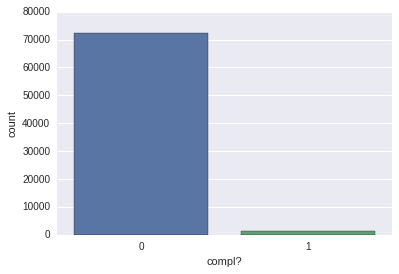

In [266]:
sns.countplot(df['compl?'])

df.groupby('compl?')['compl?'].count()

In [267]:
#Data is very skewed, class 1 is only 1.8% of the total data

In [268]:
#Checking correlation between the variables

In [269]:
df.columns

Index(['ID', 'GDR', 'yrdob', 'agegrp', 'state', 'cregion', 'iyear', 'tx_b',
       'tx_bs', 'tx_s', 'tx_z', 'tx_bz', 'tx_bd', 'tx_bsz', 'tx_bs_plus',
       'tx_bz_plus', 'tx_sz', 'tx_d', 'tx_oth', 'tx_b_plus', 'tx_p', 'tx_bp',
       'tx_life', 'num_pre_dx_grps', 'num_pre_rx_grps', 'num_tx_dx_grps',
       'num_tx_rx_grps', 'num_post_dx_grps', 'num_post_rx_grps',
       'pre_med_charges', 'pre_rx_charges', 'pre_tot_charges',
       'tx_med_charges', 'tx_rx_charges', 'tx_tot_charges', 'post_med_charges',
       'post_rx_charges', 'post_tot_charges', 'compl?', 'Flag'],
      dtype='object')

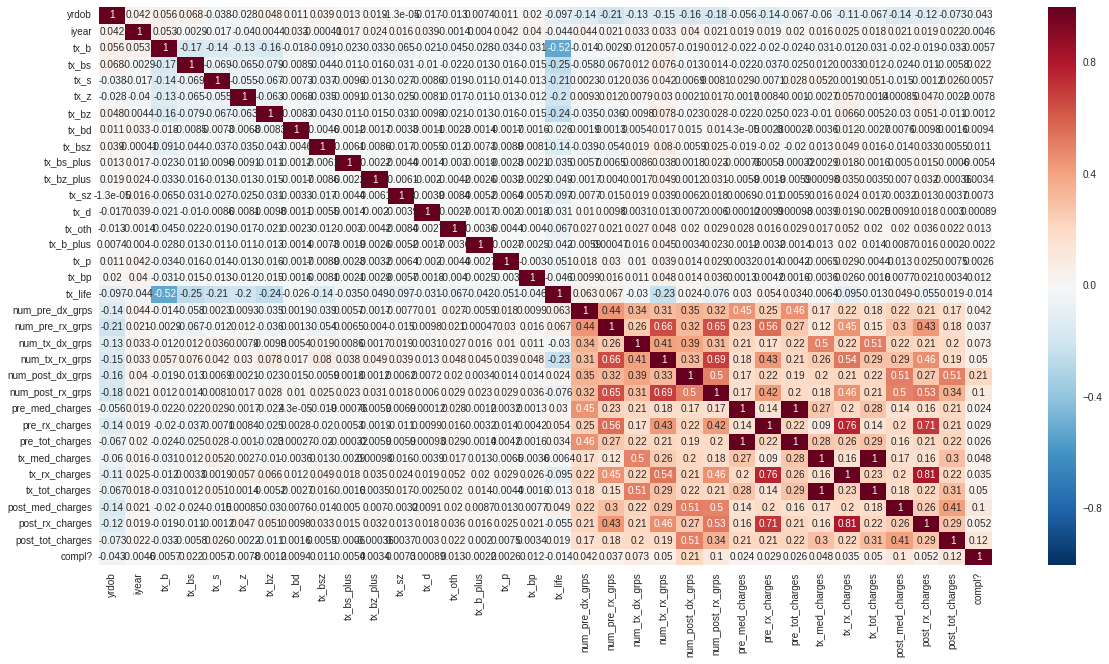

In [270]:
#Correlation Heatmap of the interval variables

var = [ 'GDR', 'yrdob', 'agegrp', 'state', 'cregion', 'iyear', 'tx_b',
       'tx_bs', 'tx_s', 'tx_z', 'tx_bz', 'tx_bd', 'tx_bsz', 'tx_bs_plus',
       'tx_bz_plus', 'tx_sz', 'tx_d', 'tx_oth', 'tx_b_plus', 'tx_p', 'tx_bp',
       'tx_life', 'num_pre_dx_grps', 'num_pre_rx_grps', 'num_tx_dx_grps',
       'num_tx_rx_grps', 'num_post_dx_grps', 'num_post_rx_grps',
       'pre_med_charges', 'pre_rx_charges', 'pre_tot_charges',
       'tx_med_charges', 'tx_rx_charges', 'tx_tot_charges', 'post_med_charges',
       'post_rx_charges', 'post_tot_charges', 'compl?']


fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df[var].corr() , annot=True)

In [271]:
#Zoming into part where the correlation is greater i.e yellow area

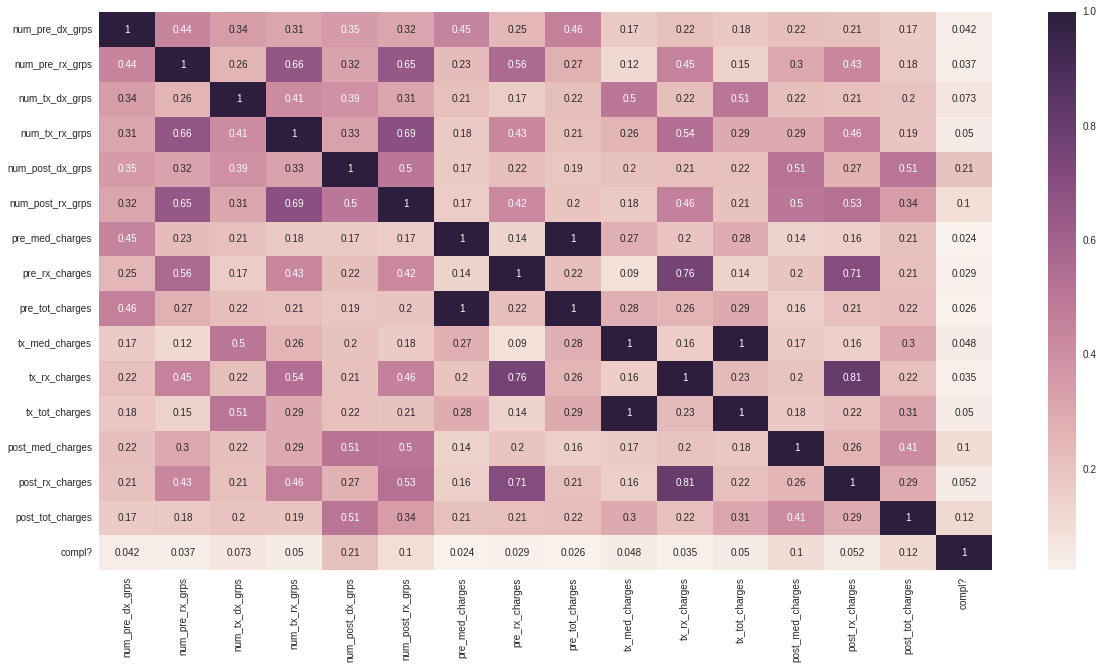

In [272]:
var=['num_pre_dx_grps', 'num_pre_rx_grps', 'num_tx_dx_grps',
       'num_tx_rx_grps', 'num_post_dx_grps', 'num_post_rx_grps',
       'pre_med_charges', 'pre_rx_charges', 'pre_tot_charges',
       'tx_med_charges', 'tx_rx_charges', 'tx_tot_charges', 'post_med_charges',
       'post_rx_charges', 'post_tot_charges', 'compl?']

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df[var].corr() , annot=True)

In [273]:
#Variables are not very correlated, only tx_tot_charges and tx_med_charges are perfectly correlated with correlation 1

In [274]:
#Checking distribution of variables w.r.t the target variable

In [275]:
df2 = df[df['compl?'] == 1]

In [276]:
df2.shape

(1352, 40)

In [277]:
v = ['GDR', 'yrdob', 'agegrp', 'state', 'cregion', 'iyear', 'tx_b',
       'tx_bs', 'tx_s', 'tx_z', 'tx_bz', 'tx_bd', 'tx_bsz', 'tx_bs_plus',
       'tx_bz_plus', 'tx_sz', 'tx_d', 'tx_oth', 'tx_b_plus', 'tx_p', 'tx_bp',
       'tx_life', 'num_pre_dx_grps', 'num_pre_rx_grps', 'num_tx_dx_grps',
       'num_tx_rx_grps', 'num_post_dx_grps', 'num_post_rx_grps',
       'pre_med_charges', 'pre_rx_charges', 'pre_tot_charges',
       'tx_med_charges', 'tx_rx_charges', 'tx_tot_charges', 'post_med_charges',
       'post_rx_charges', 'post_tot_charges']

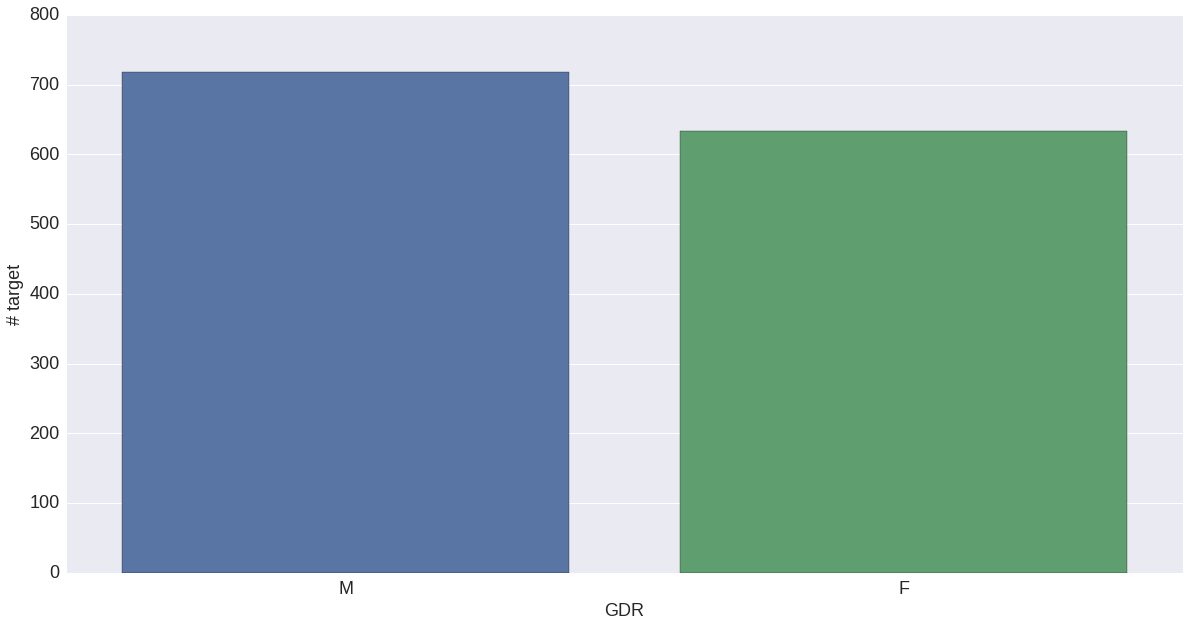

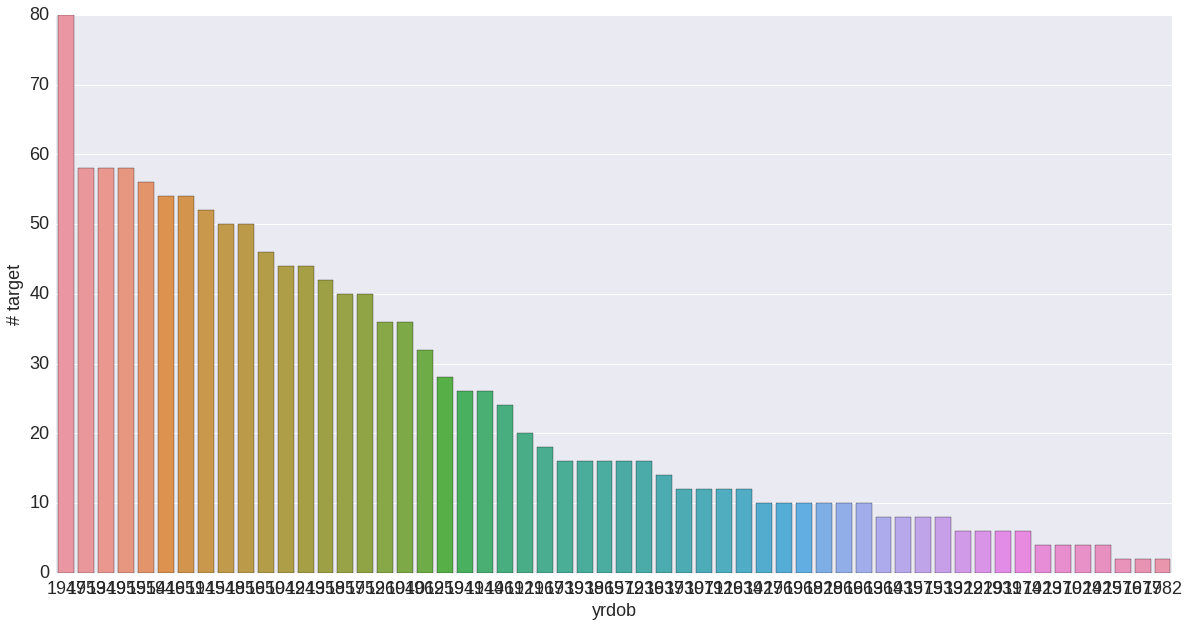

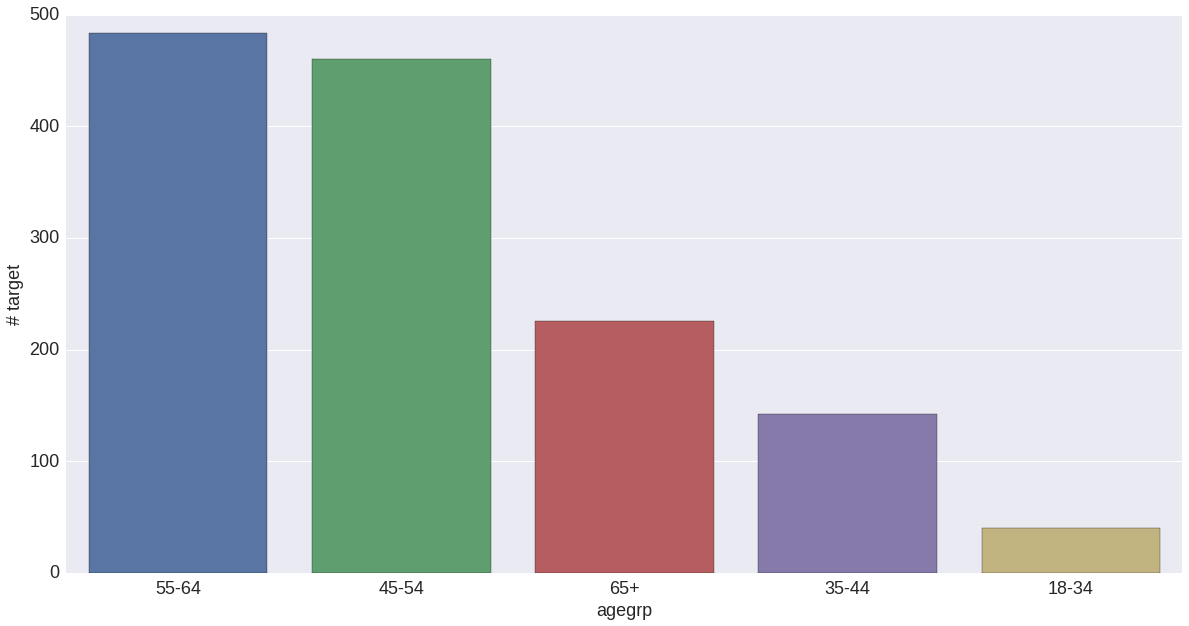

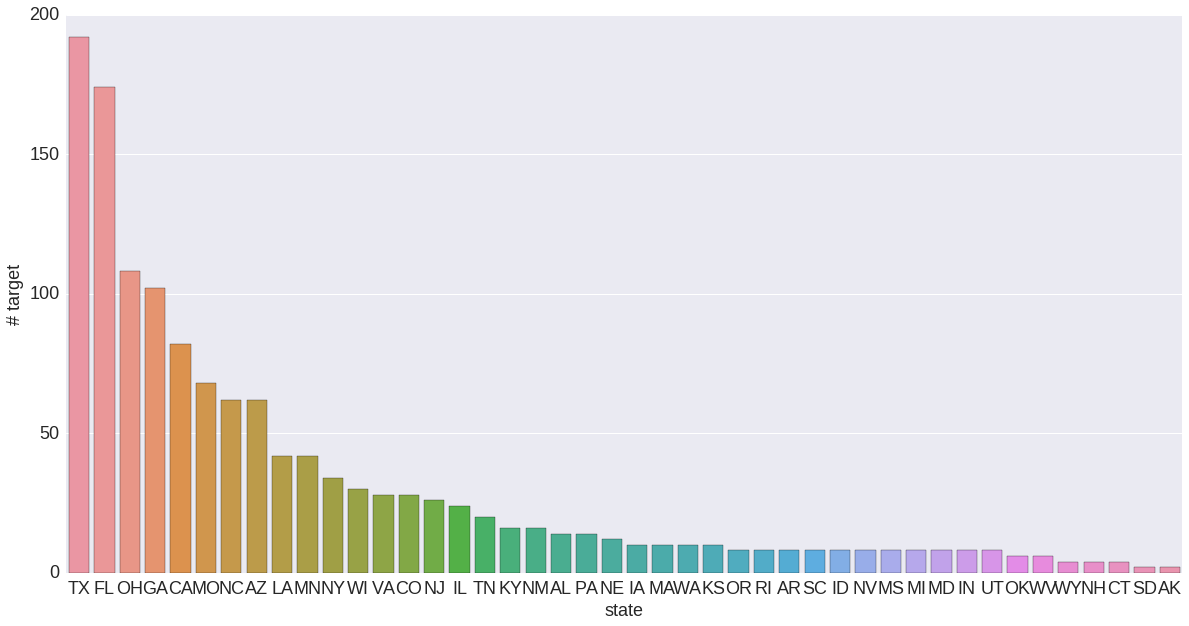

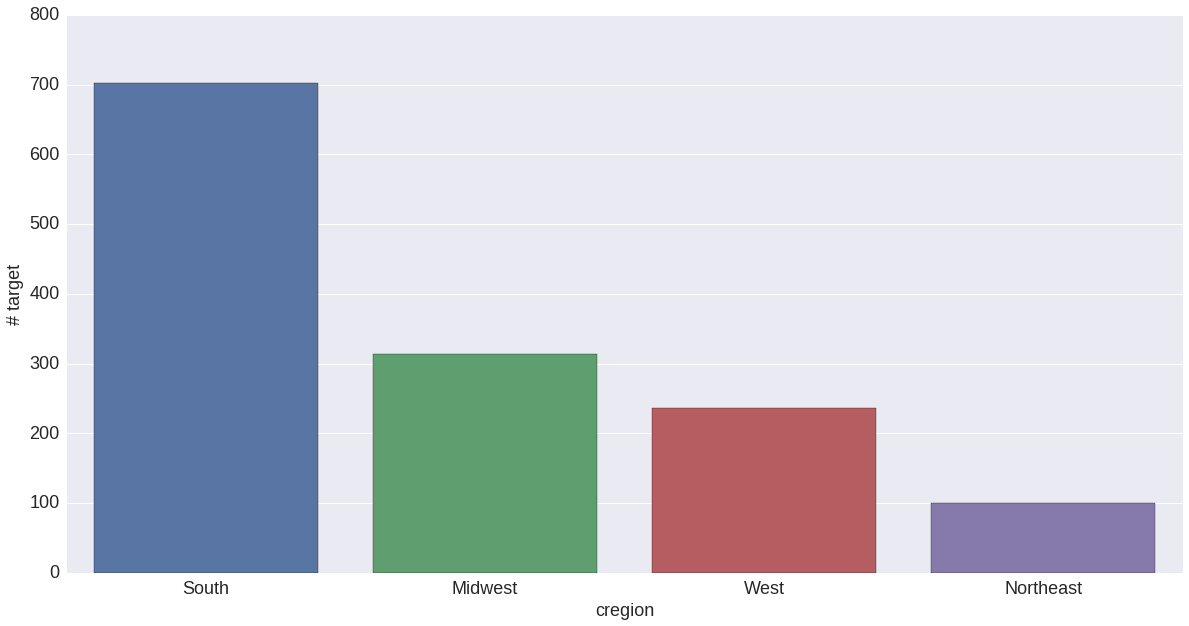

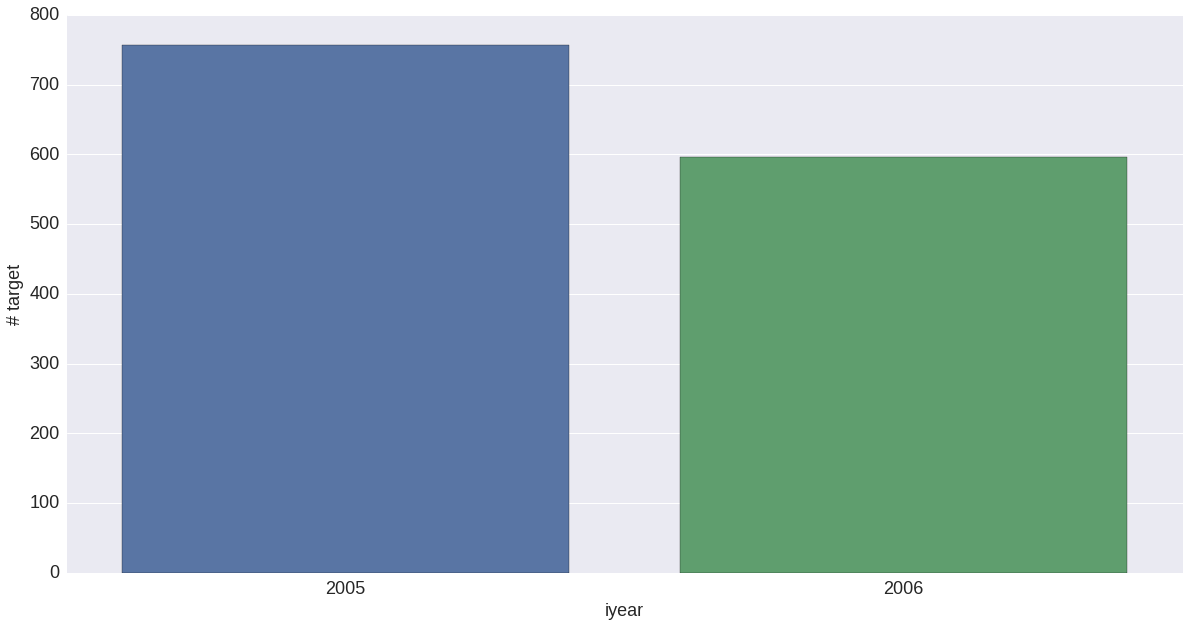

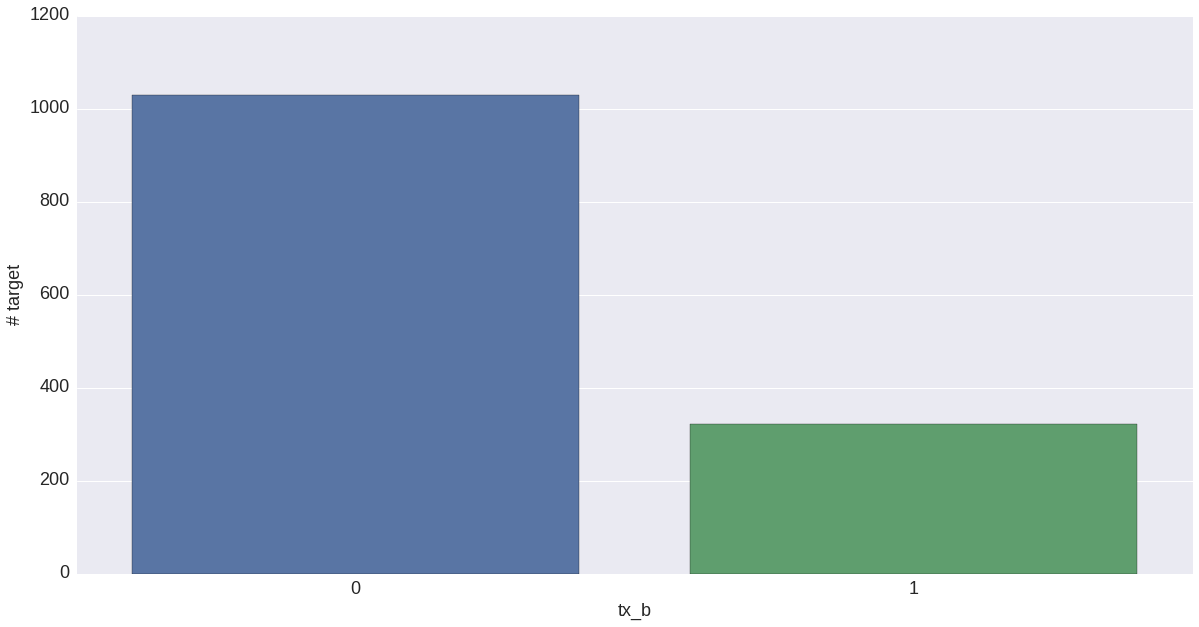

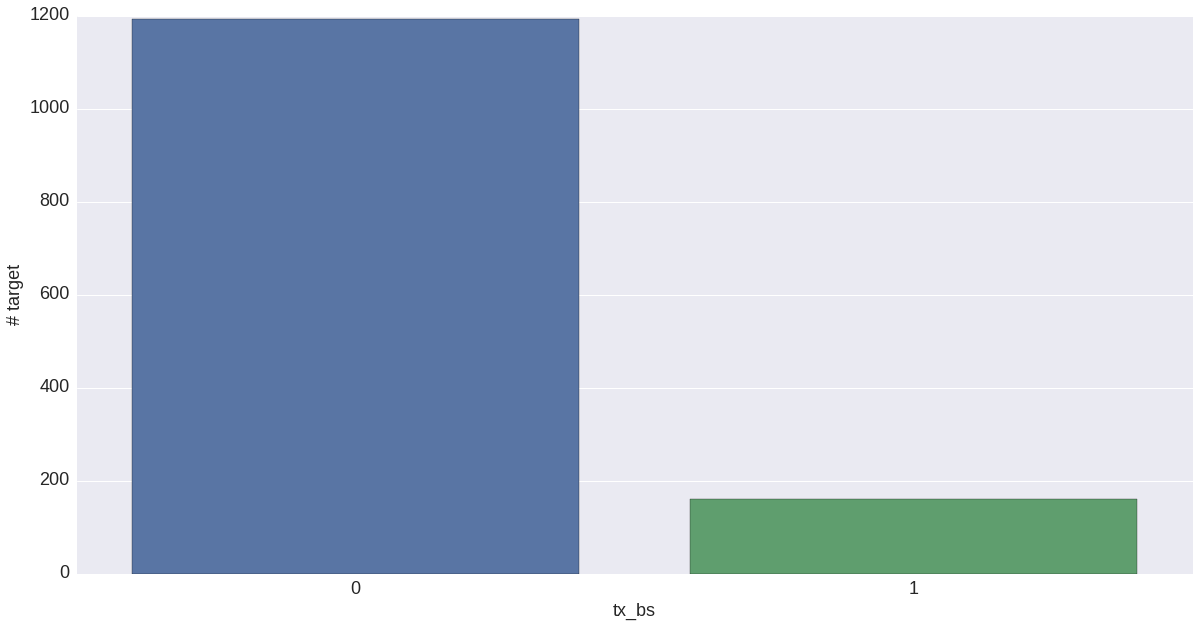

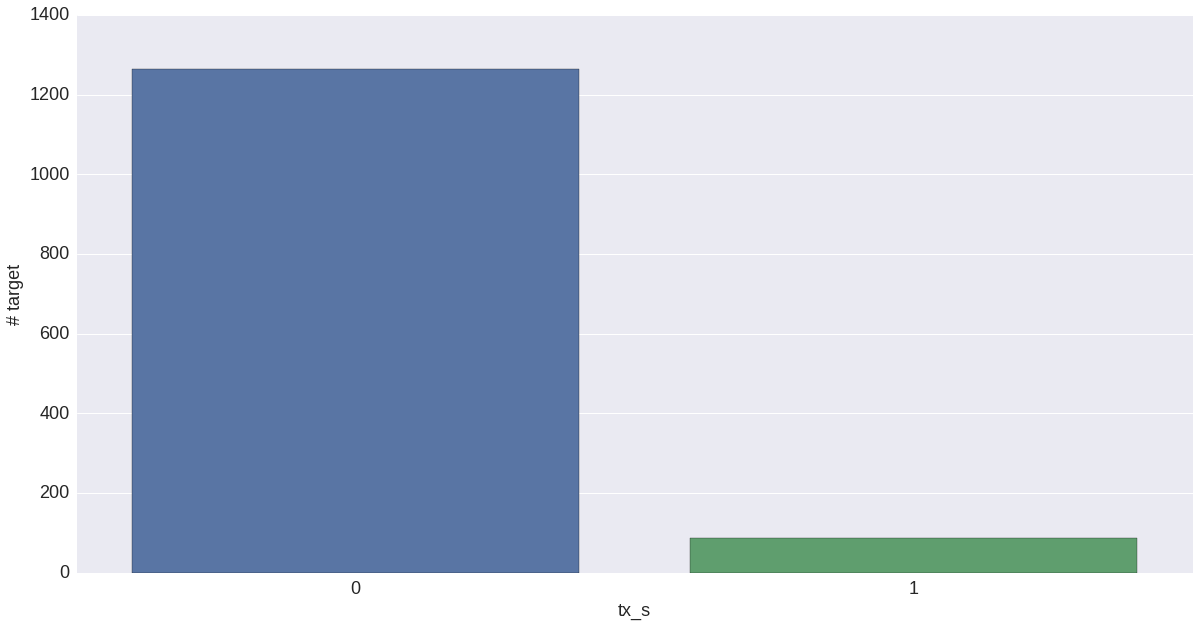

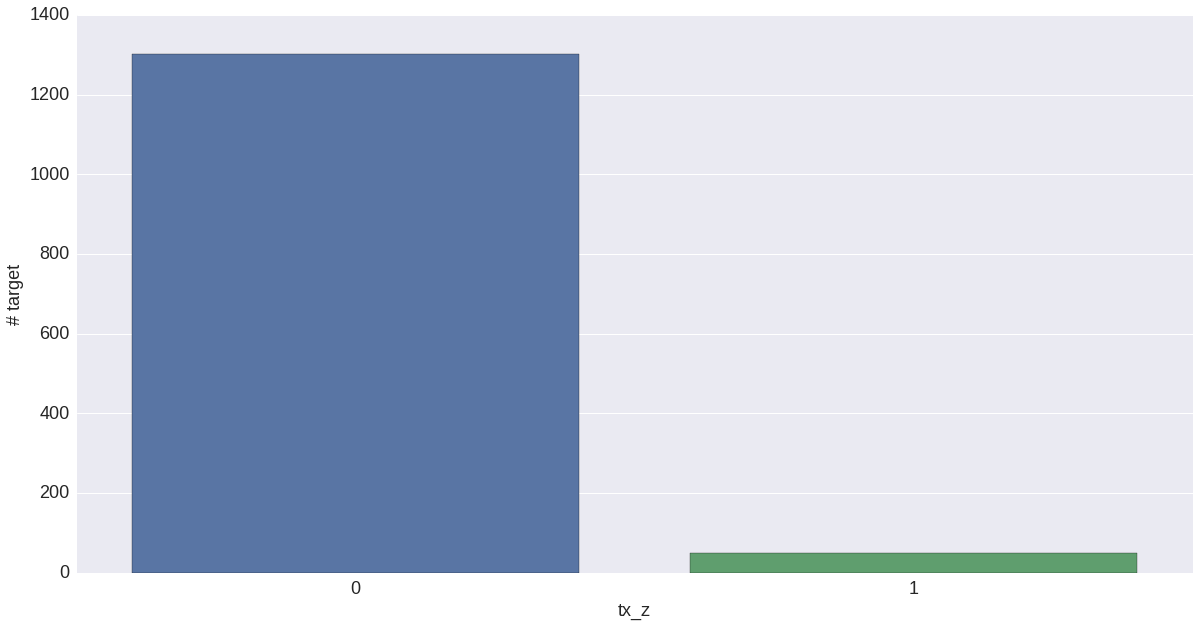

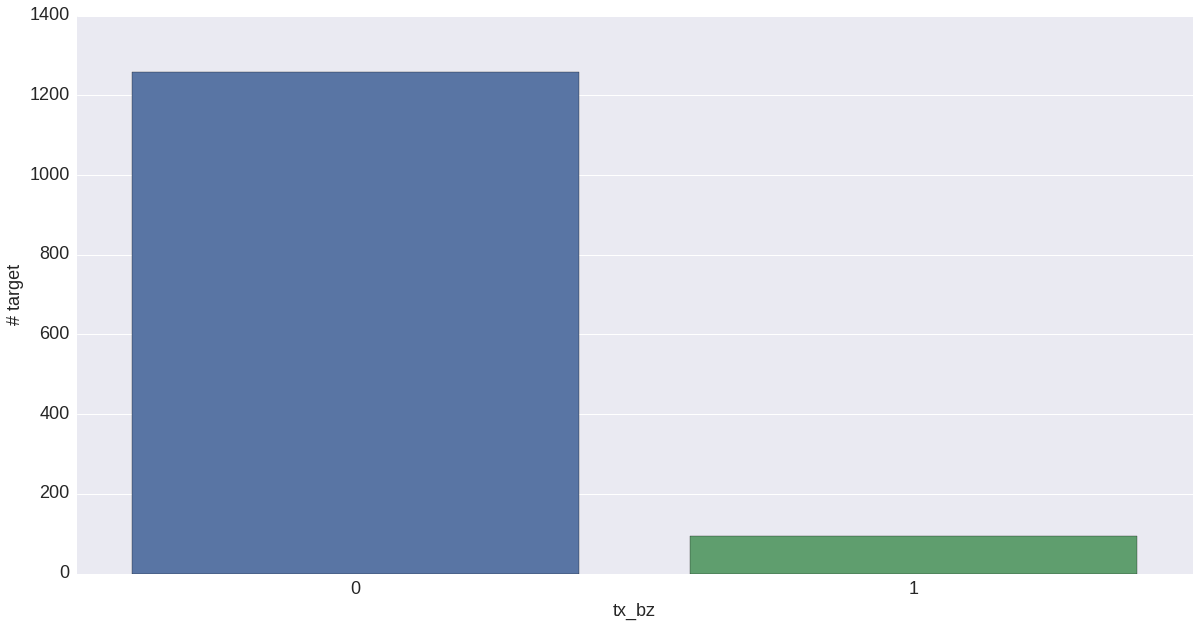

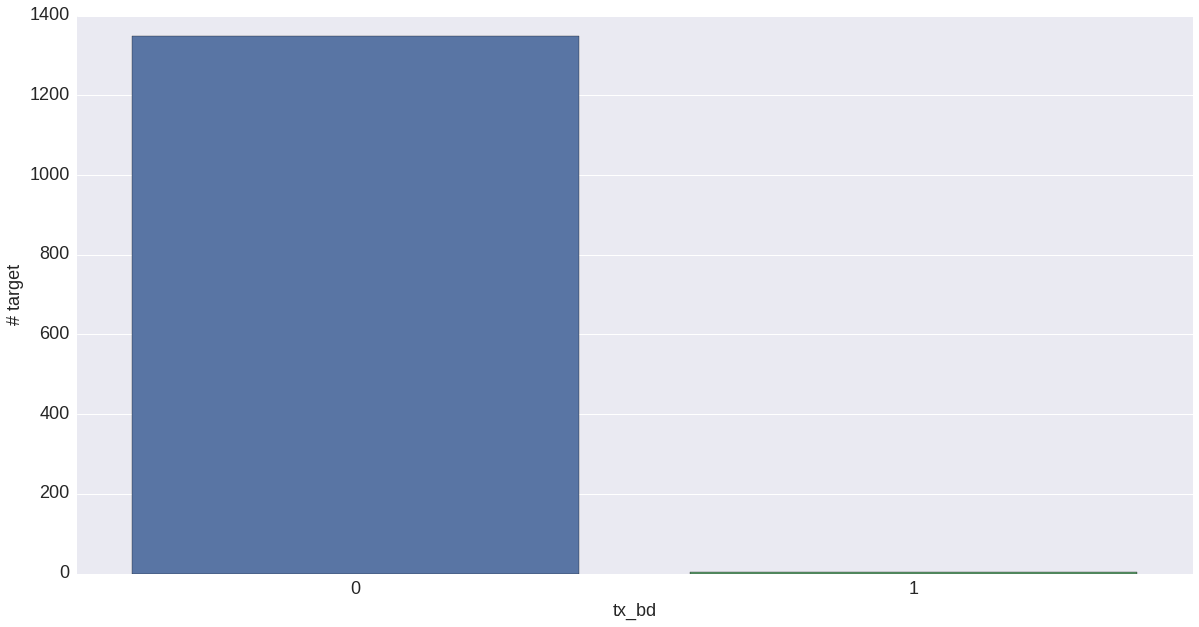

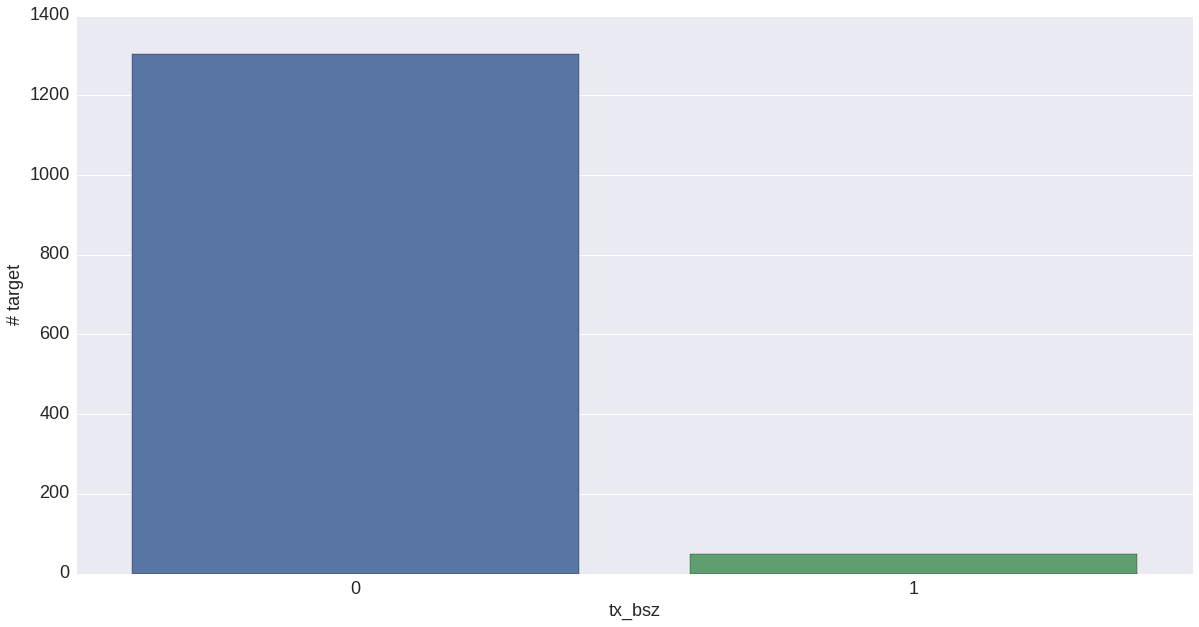

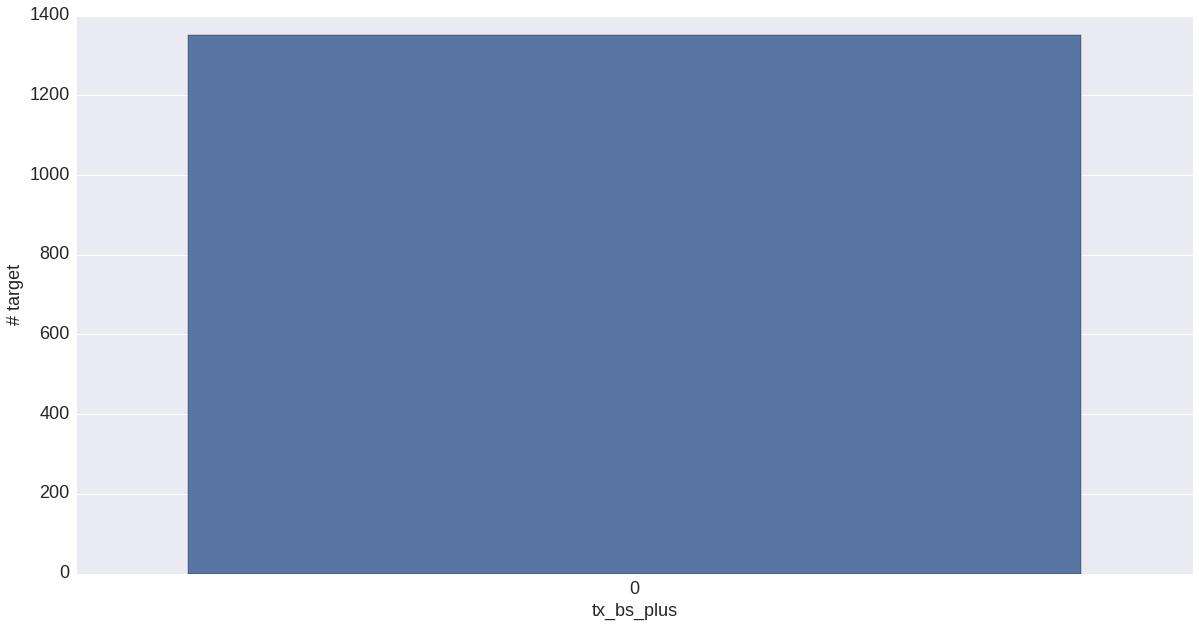

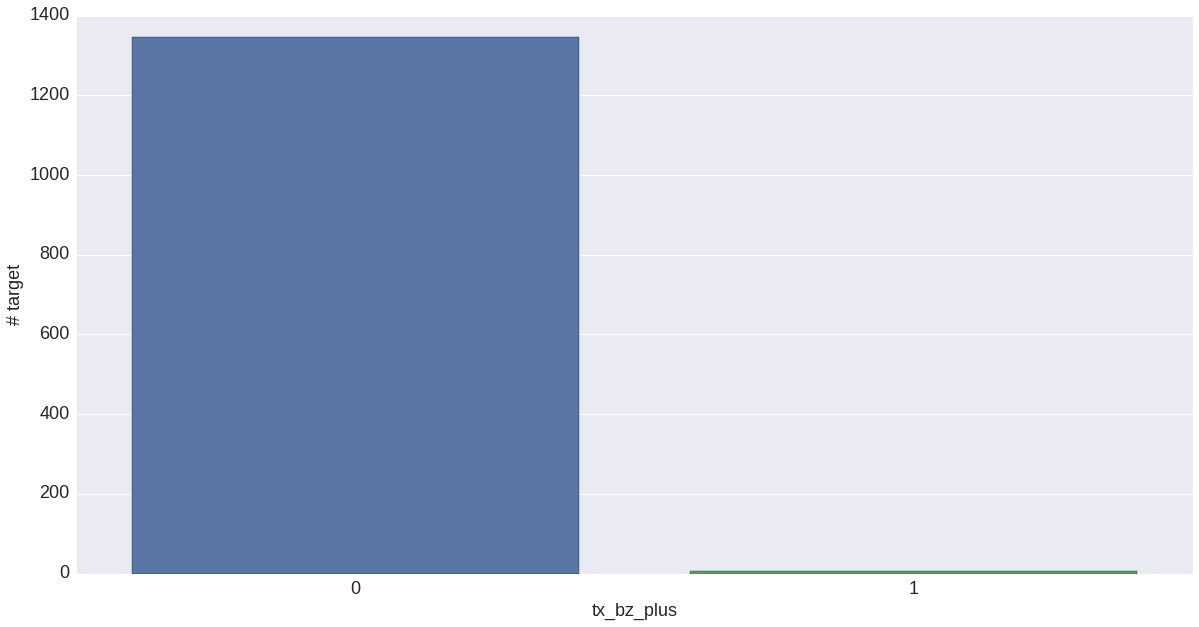

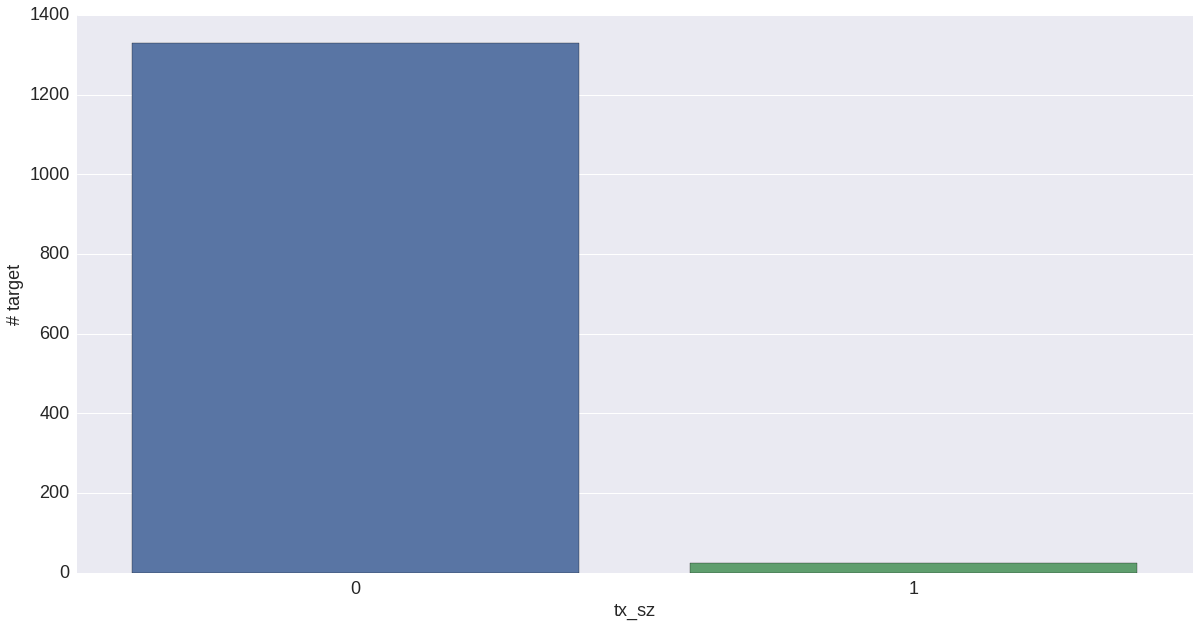

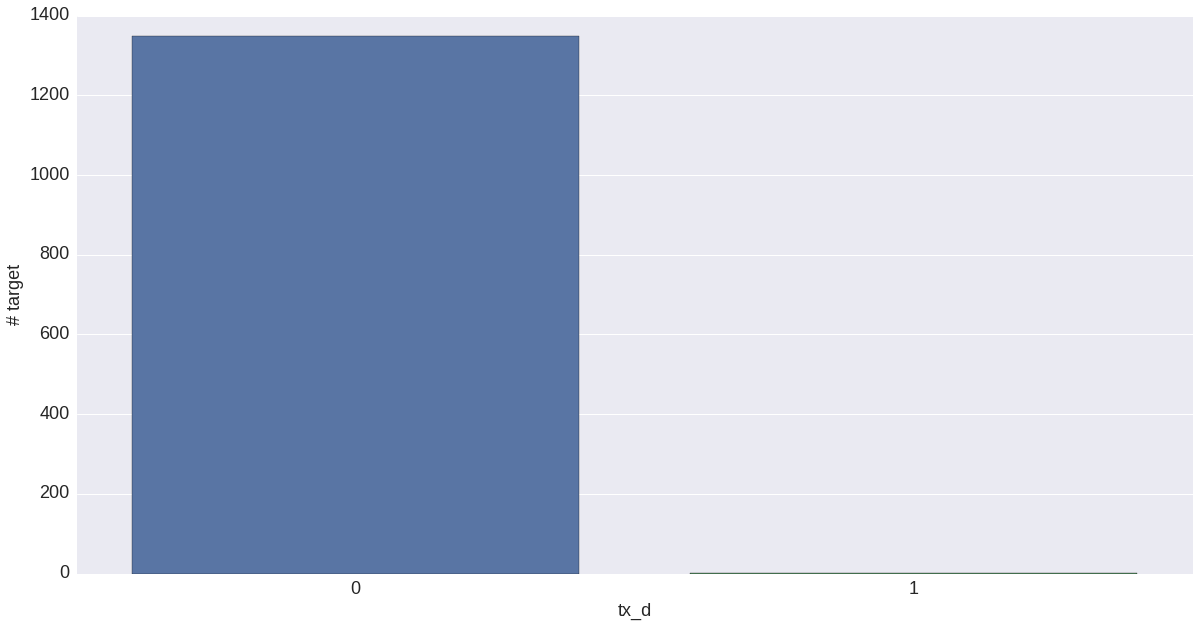

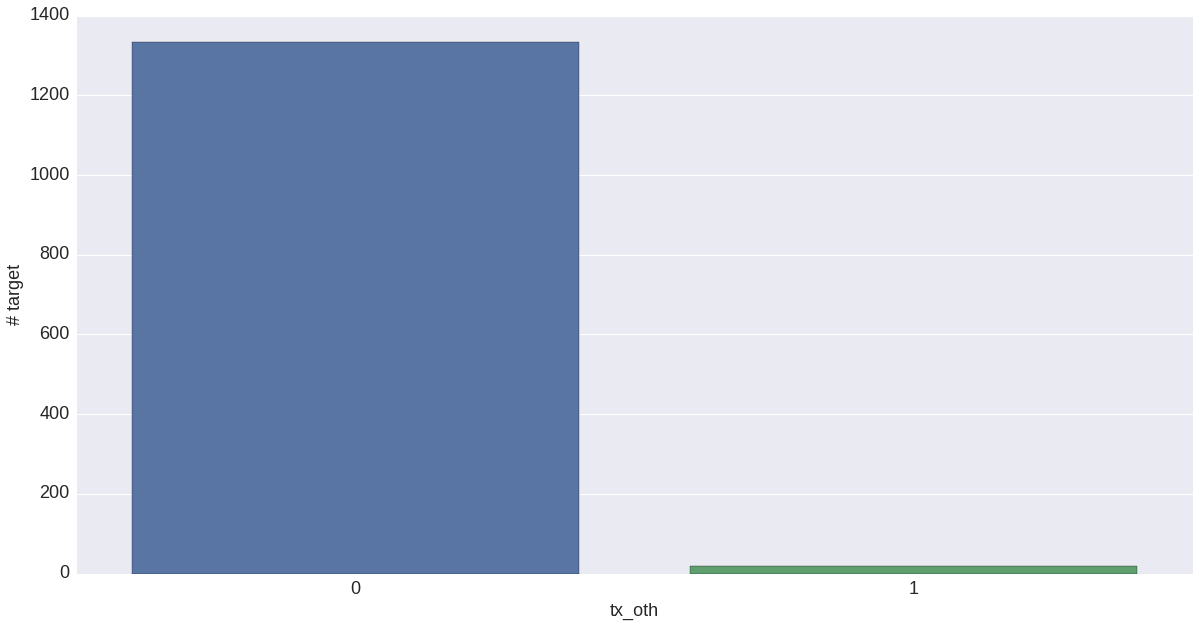

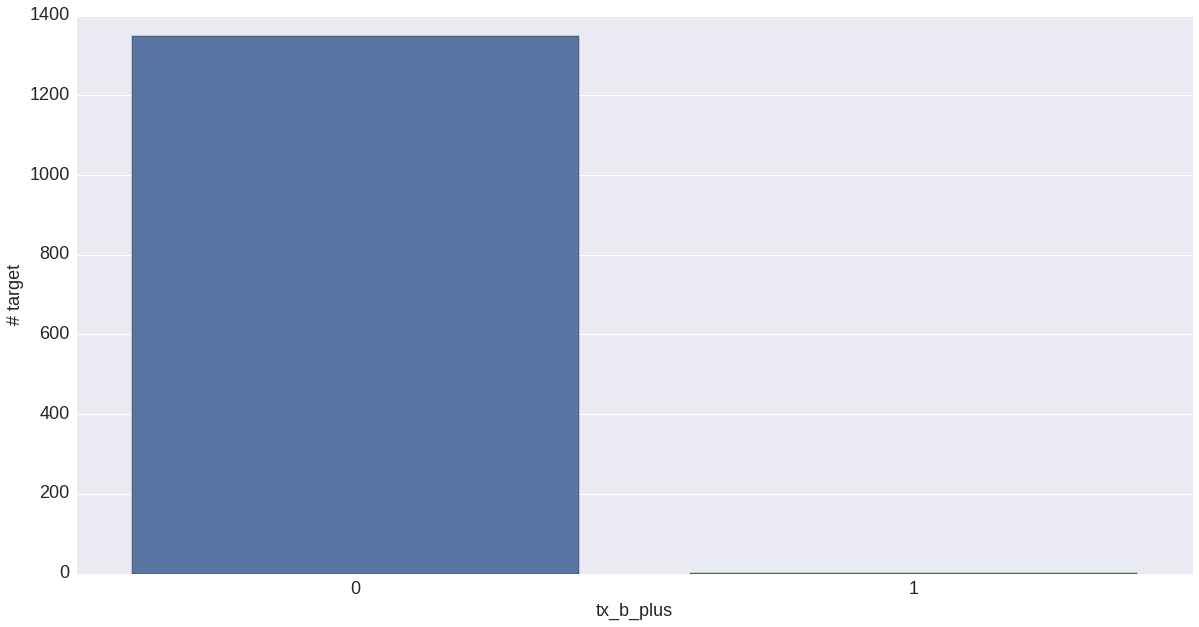

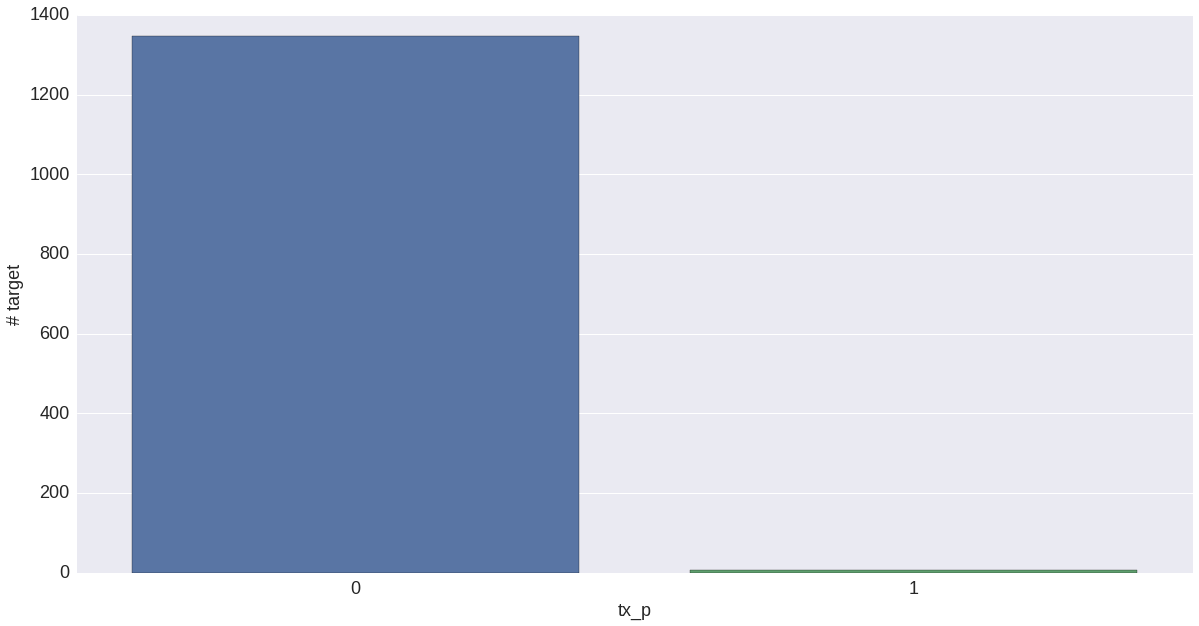

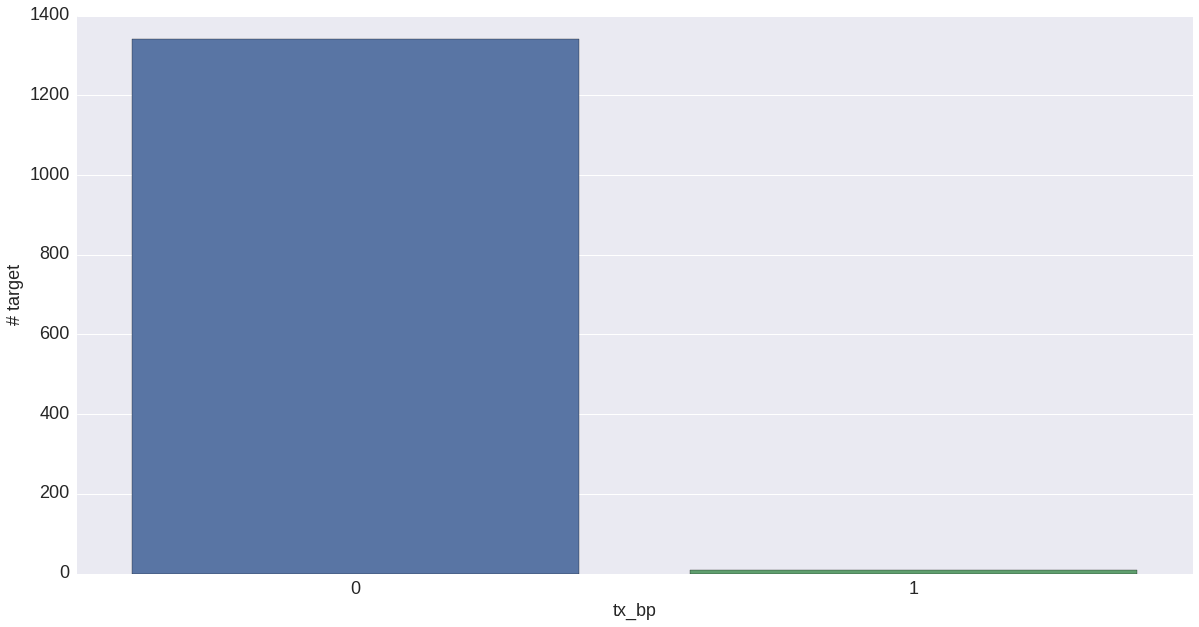

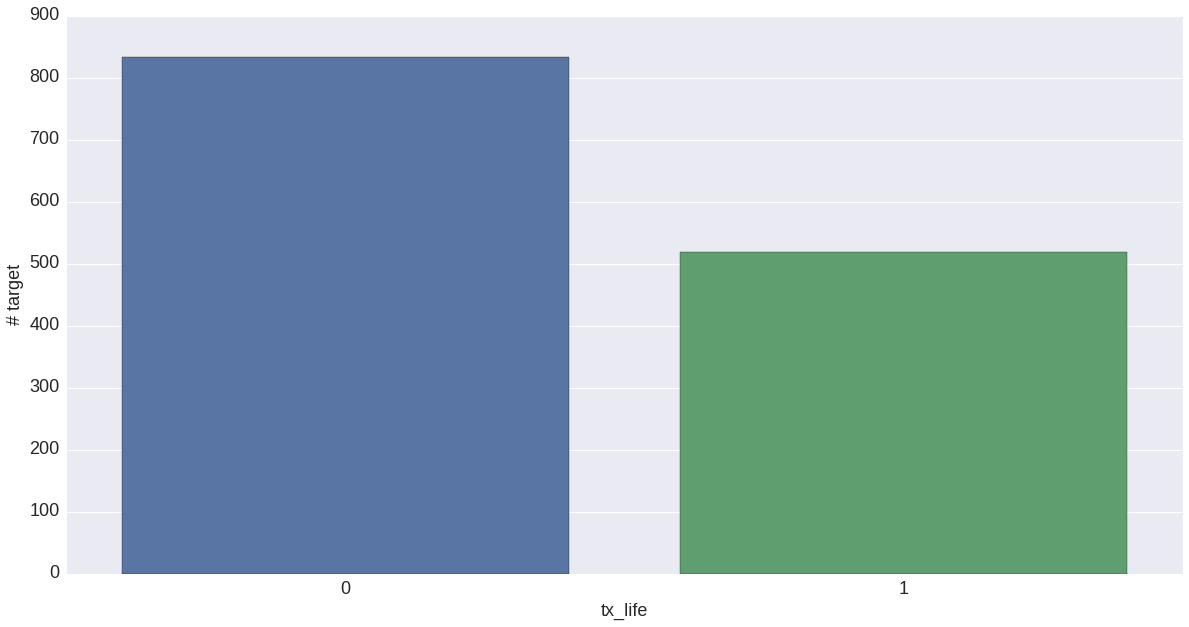

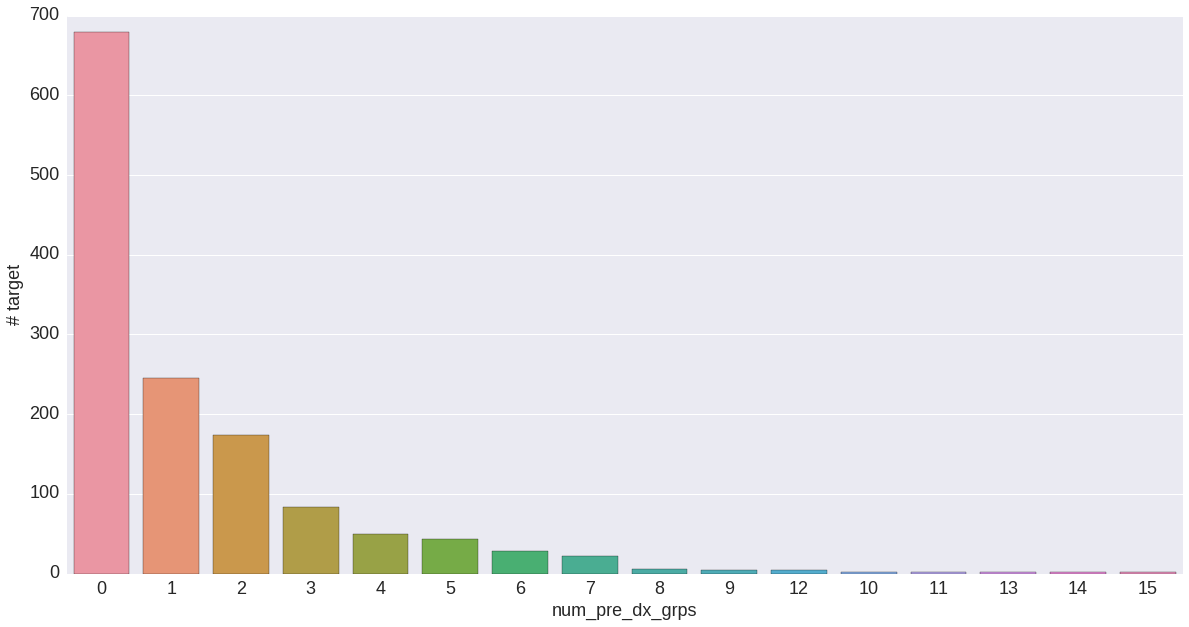

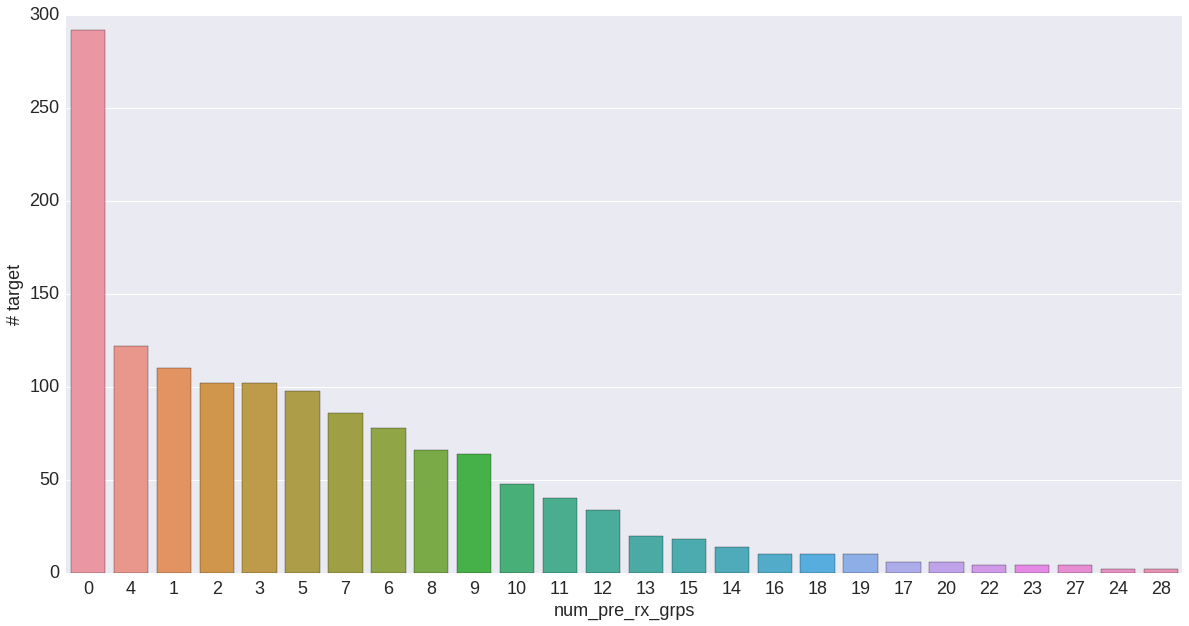

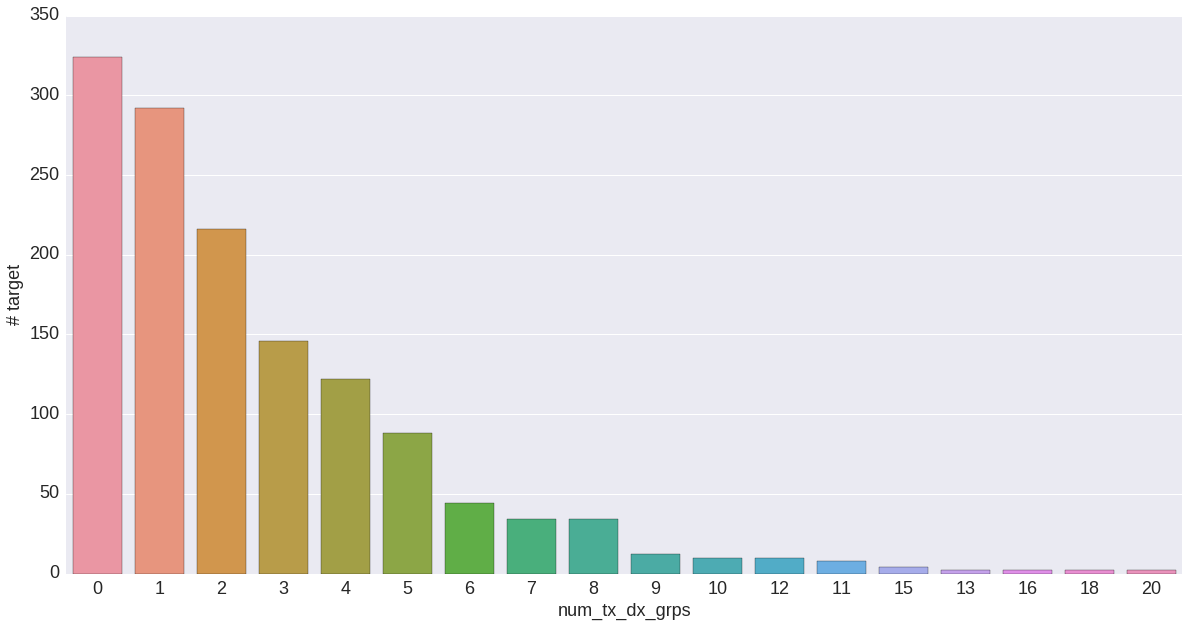

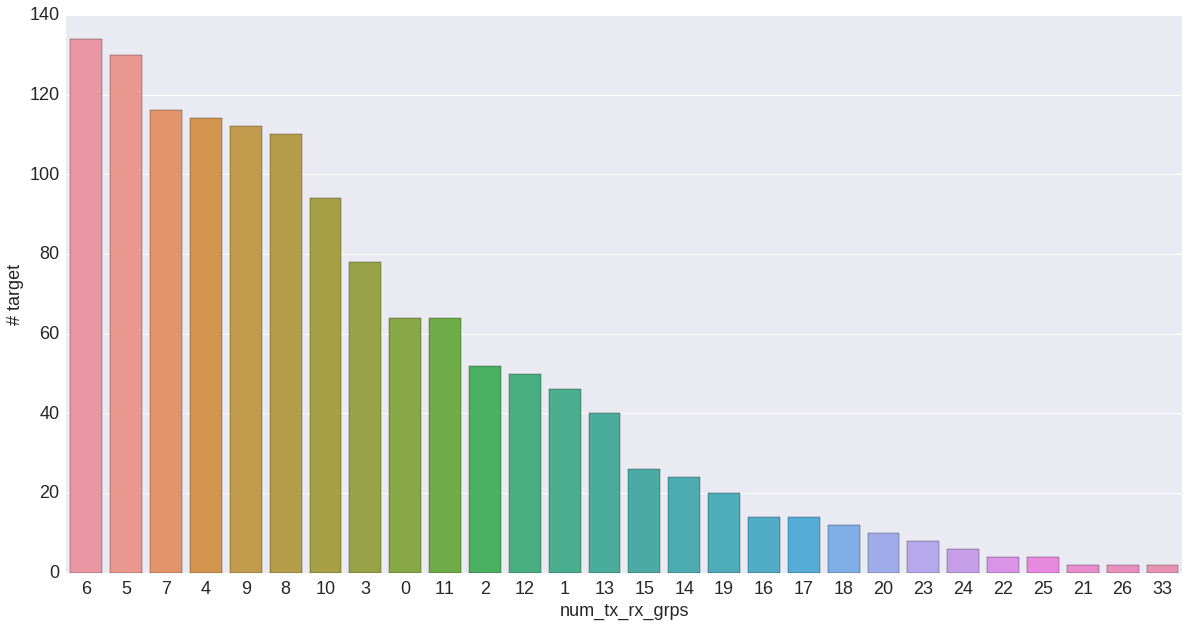

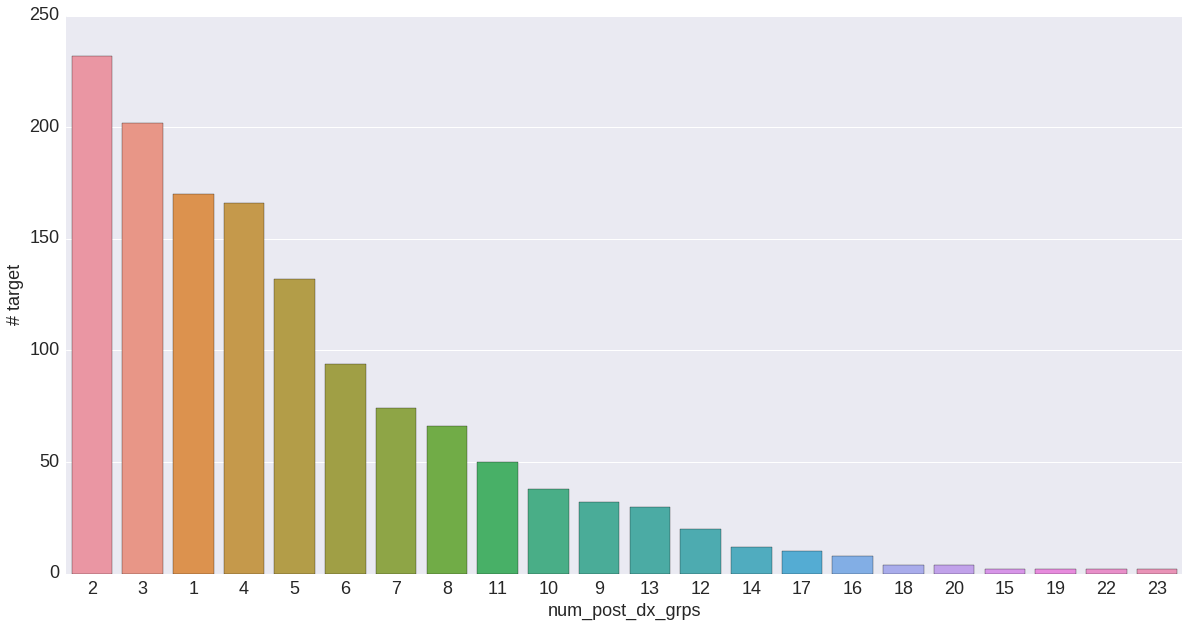

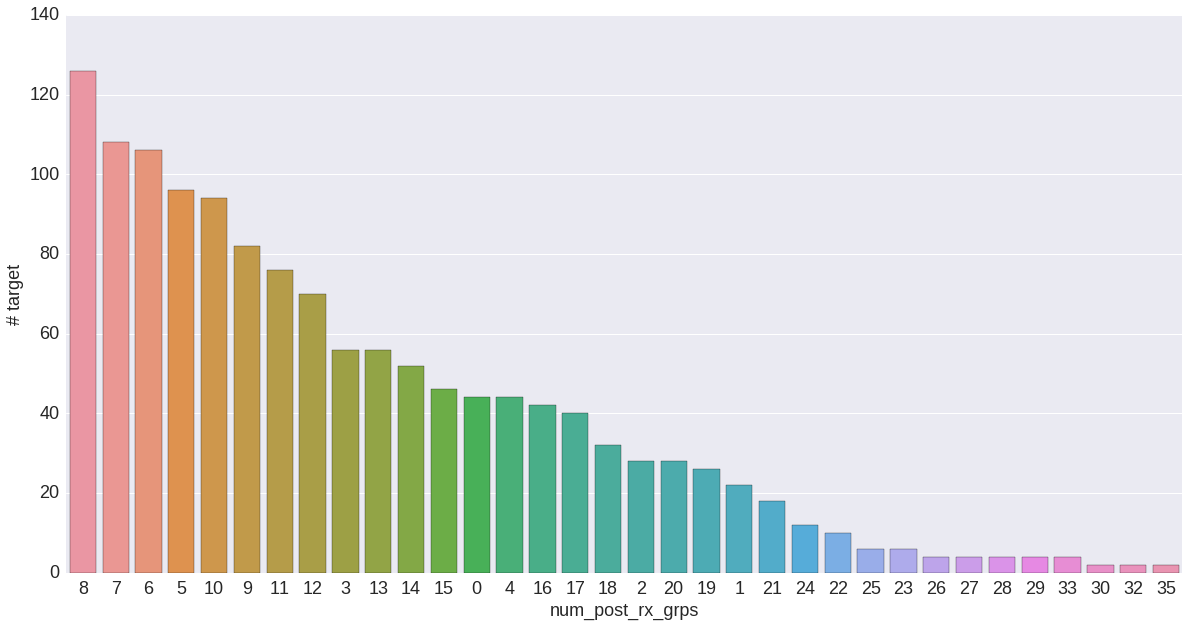

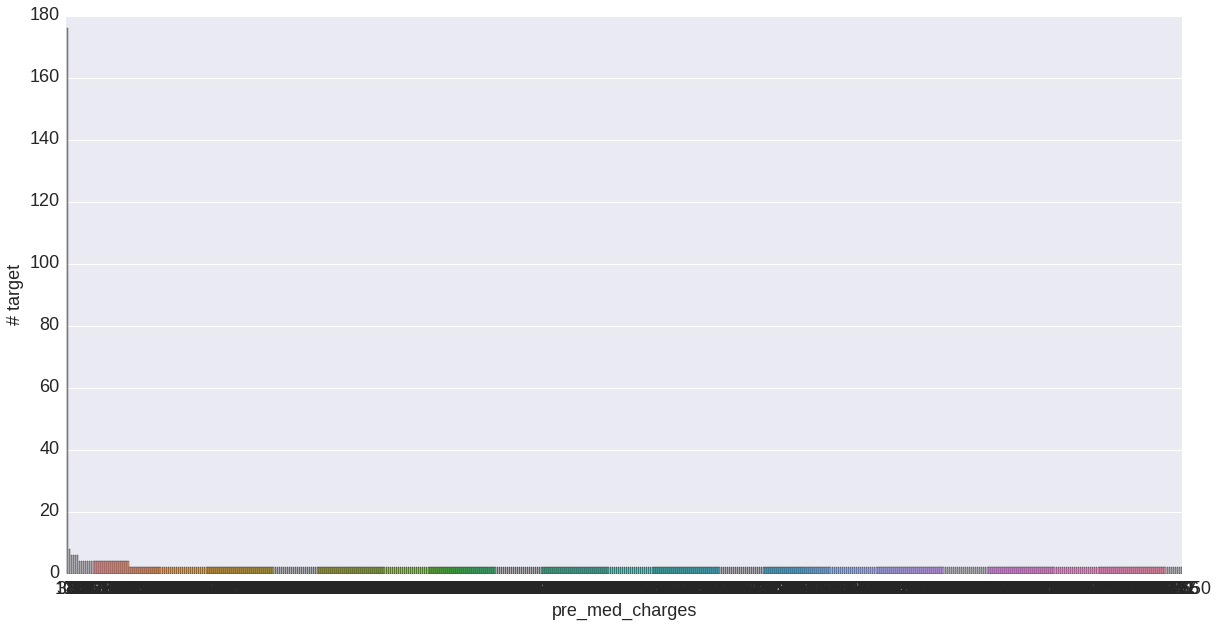

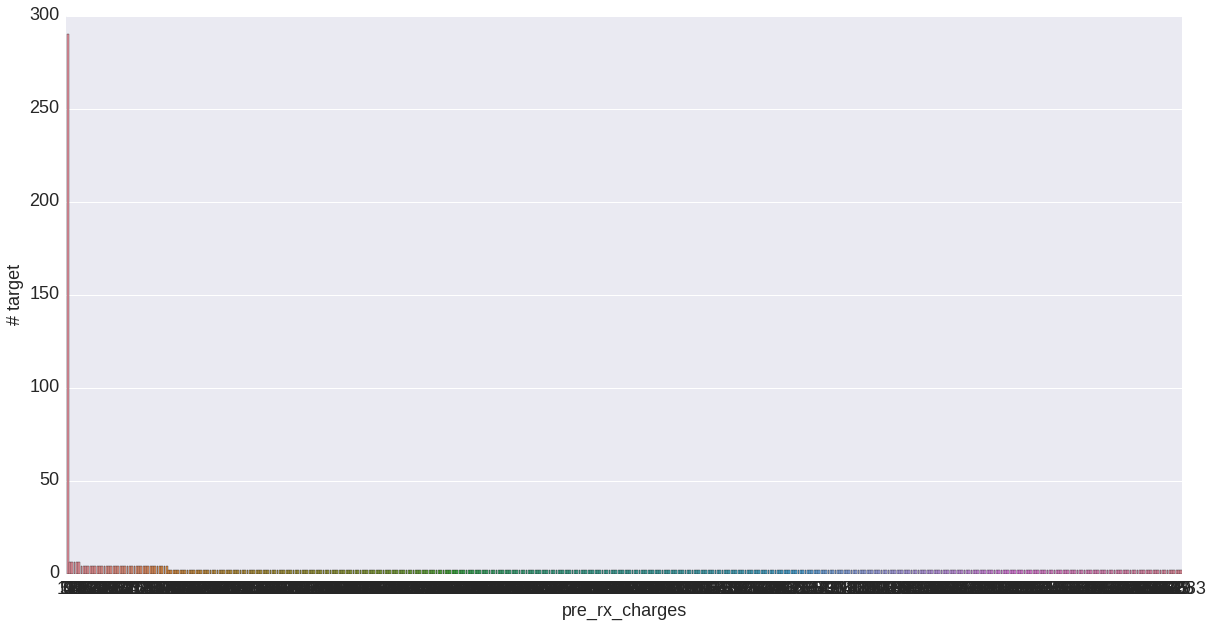

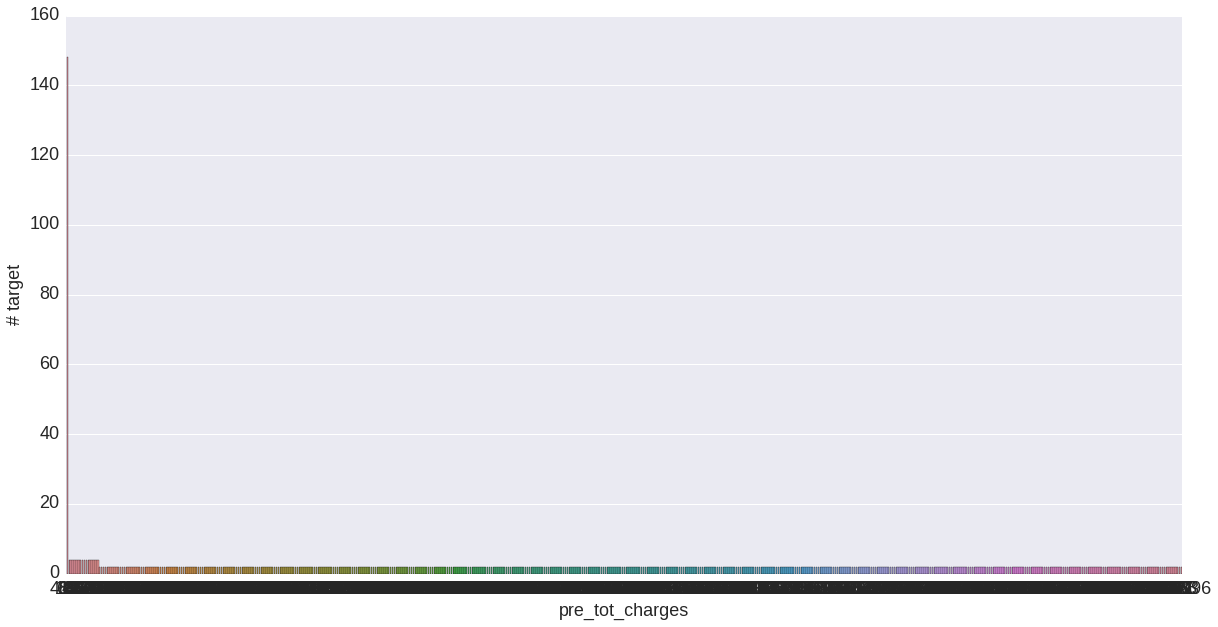

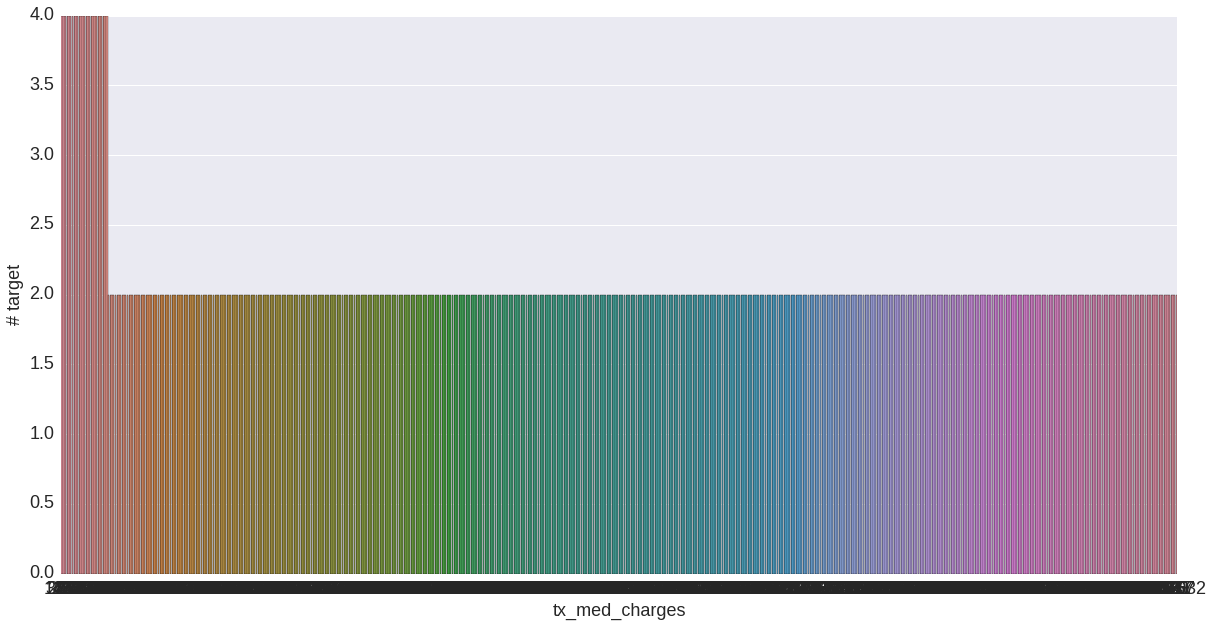

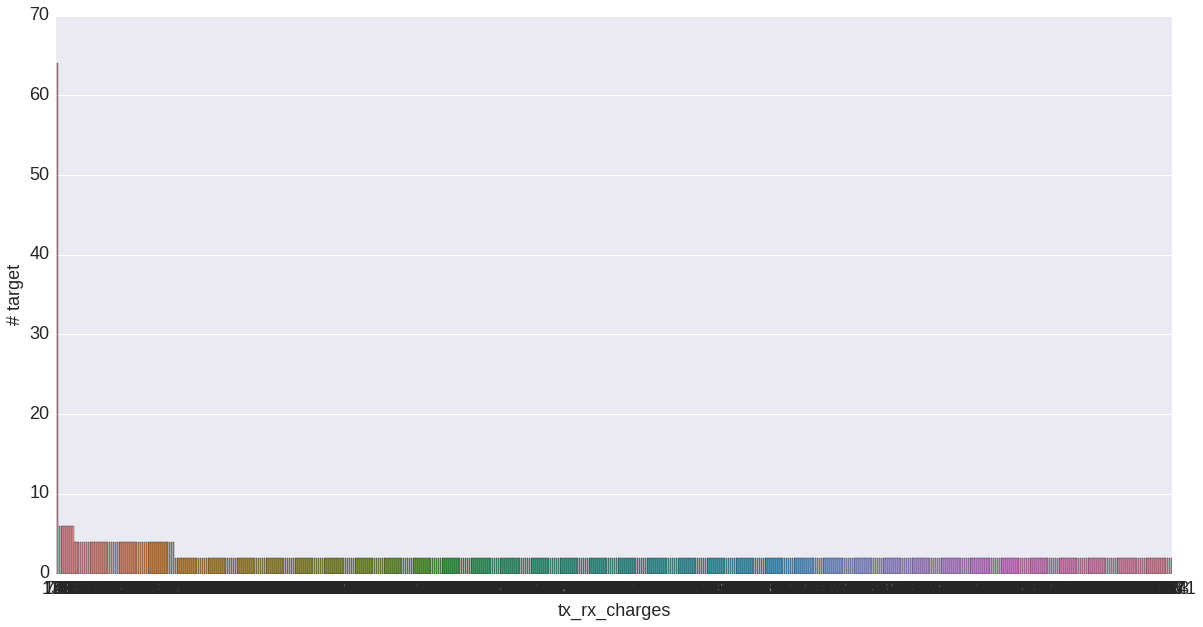

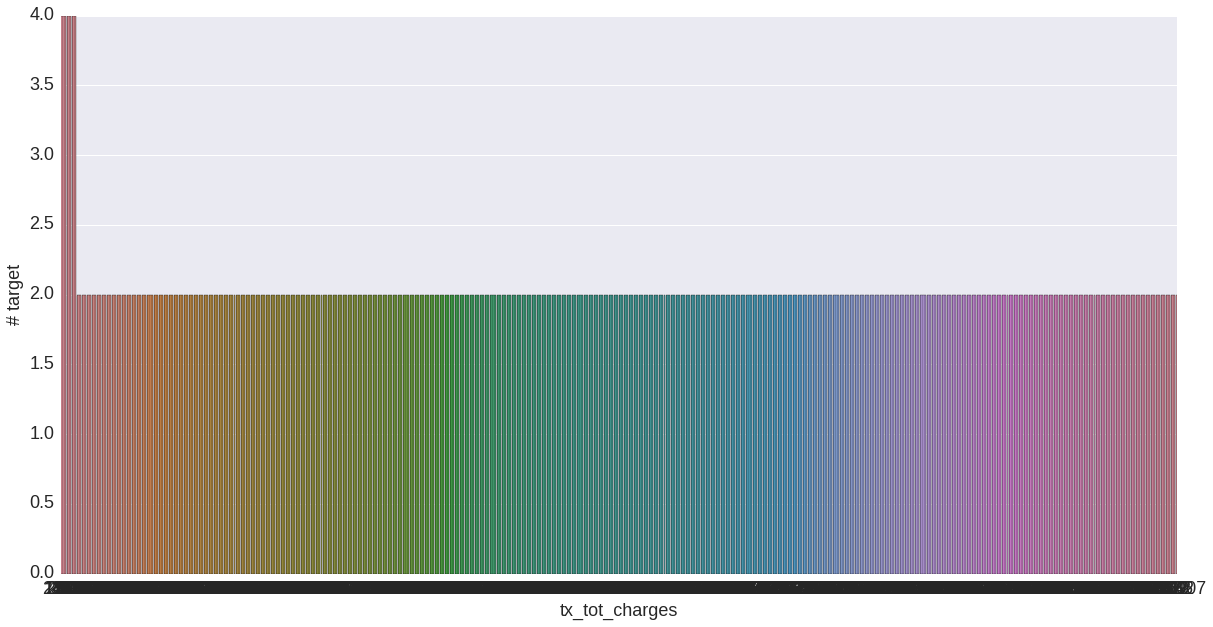

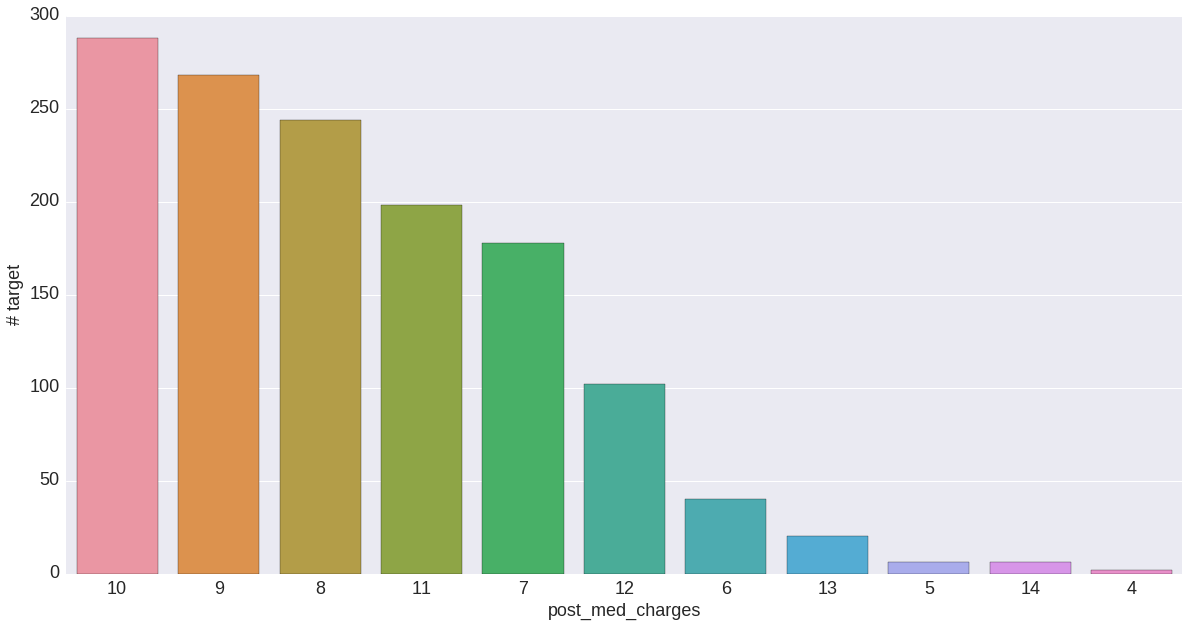

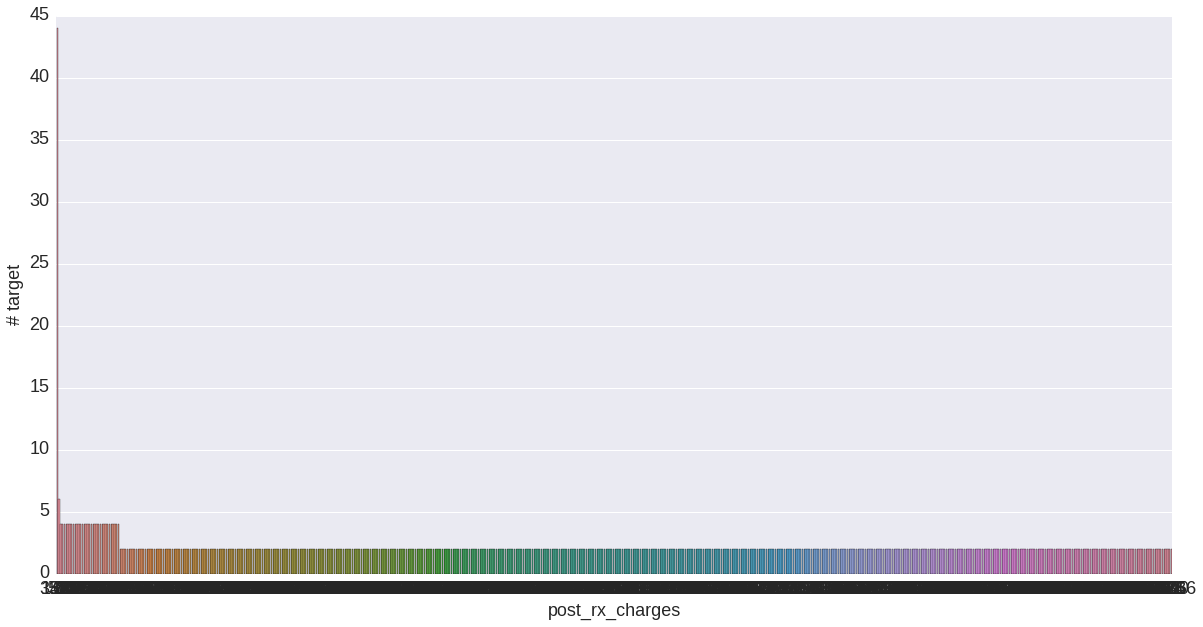

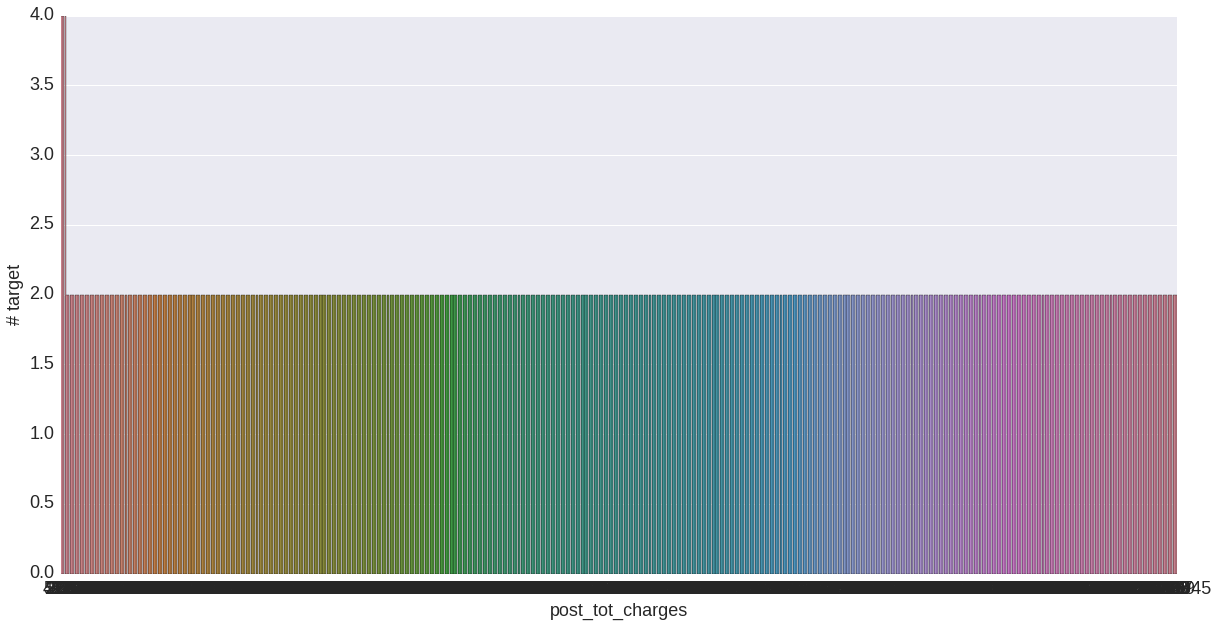

In [278]:
for f in v:
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = df2[[f, 'compl?']].groupby(list(df2[[f]]), as_index=False).sum()
    cat_perc.sort_values(by='compl?', ascending=False, inplace=True)
    x1 = cat_perc.columns[0]
    y1 = cat_perc.columns[1]
    sns.barplot(ax = ax, x = x1, y = y1, data=cat_perc, order=cat_perc[x1])
    plt.ylabel('# target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)

In [279]:
#VAriables to remove - yrdob, State, tx_z, tx_bd, tx_bs_plus, tx_bz_plus, tx_sz, tx_d, tx_oth, tx_b_plus,tx_p, tx_bp,
#pre_med_charges, 

In [280]:
#Variables to group - num_pre_dx_grps, num_pre_rx_grps, num_tx_dx_grps, num_tx_rx_grps, num_post_dx_grps, num_post_rx_grps,
#pre_med_charges, pre_rx_charges, pre_tot_charges, tx_med_charges, tx_rx_charges, tx_tot_charges, post_rx_charges, 
#post_tot_charges

In [281]:
#Distribution of compl? variable wrt grps variables

In [282]:
#df2 = df

In [283]:
var = ['num_pre_dx_grps','num_pre_rx_grps','num_tx_dx_grps','num_tx_rx_grps','num_post_dx_grps','num_post_rx_grps']

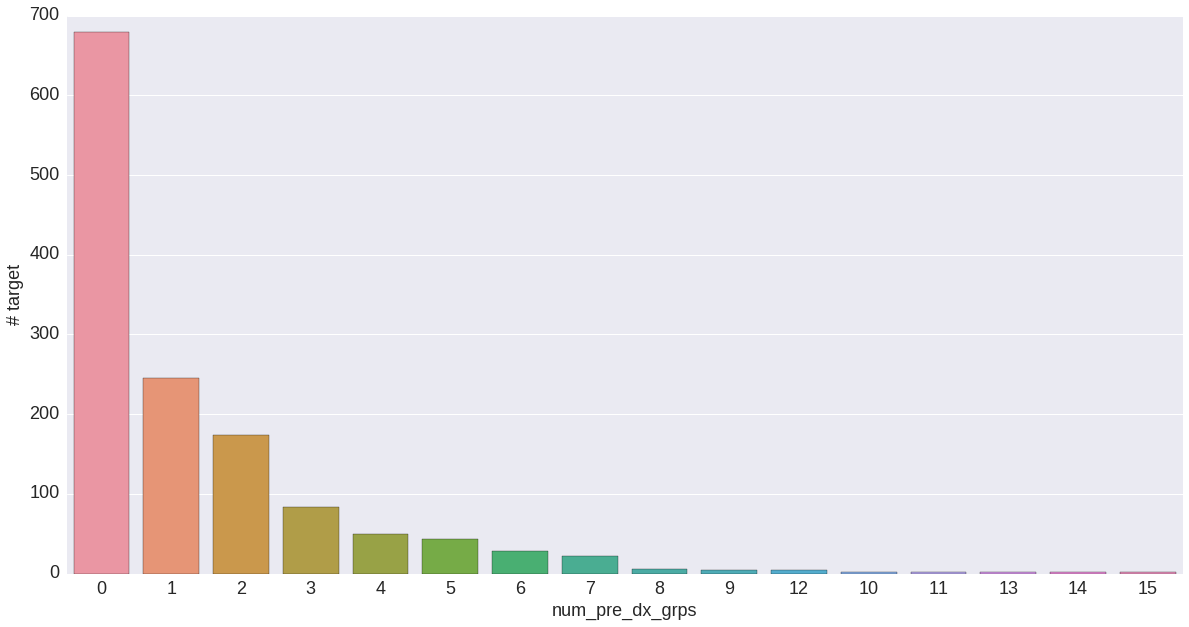

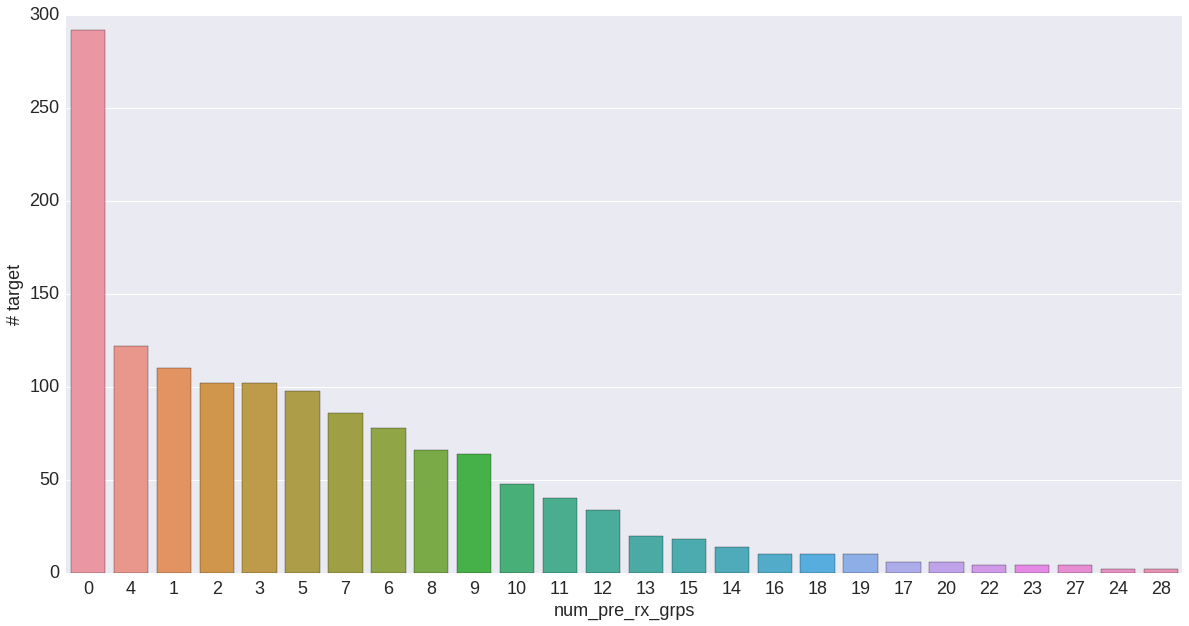

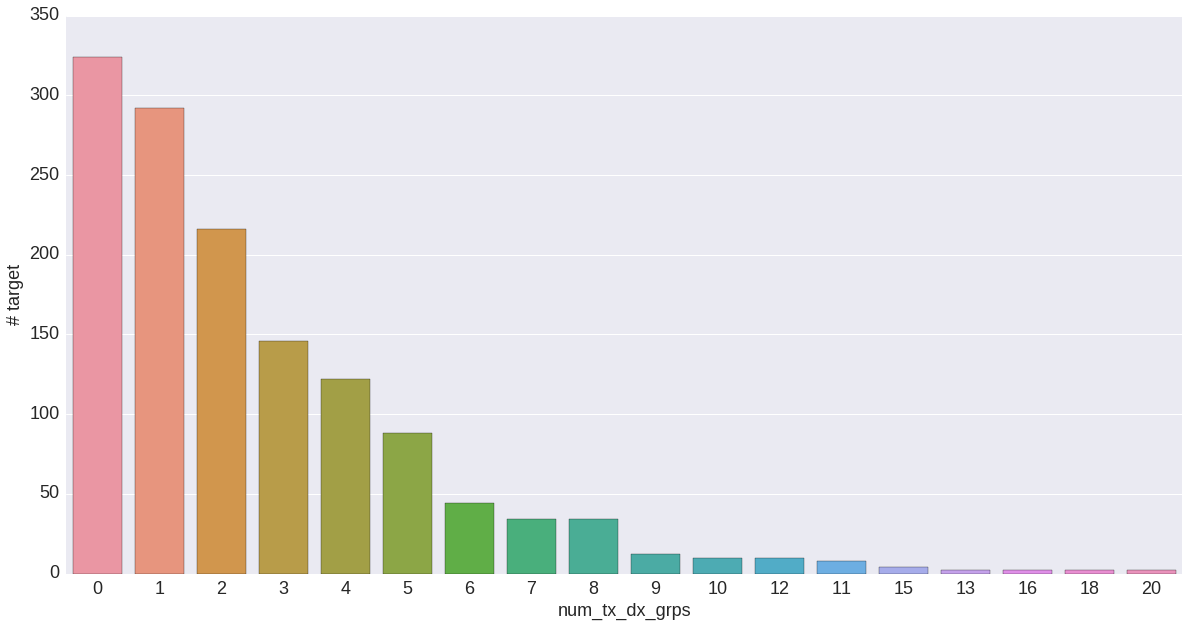

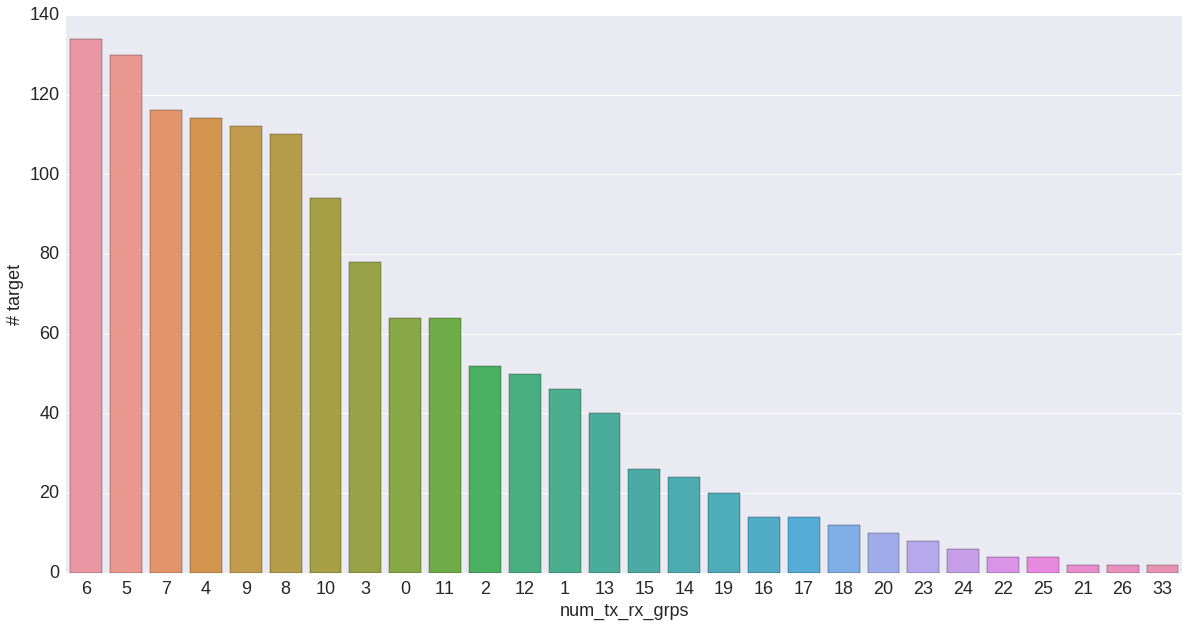

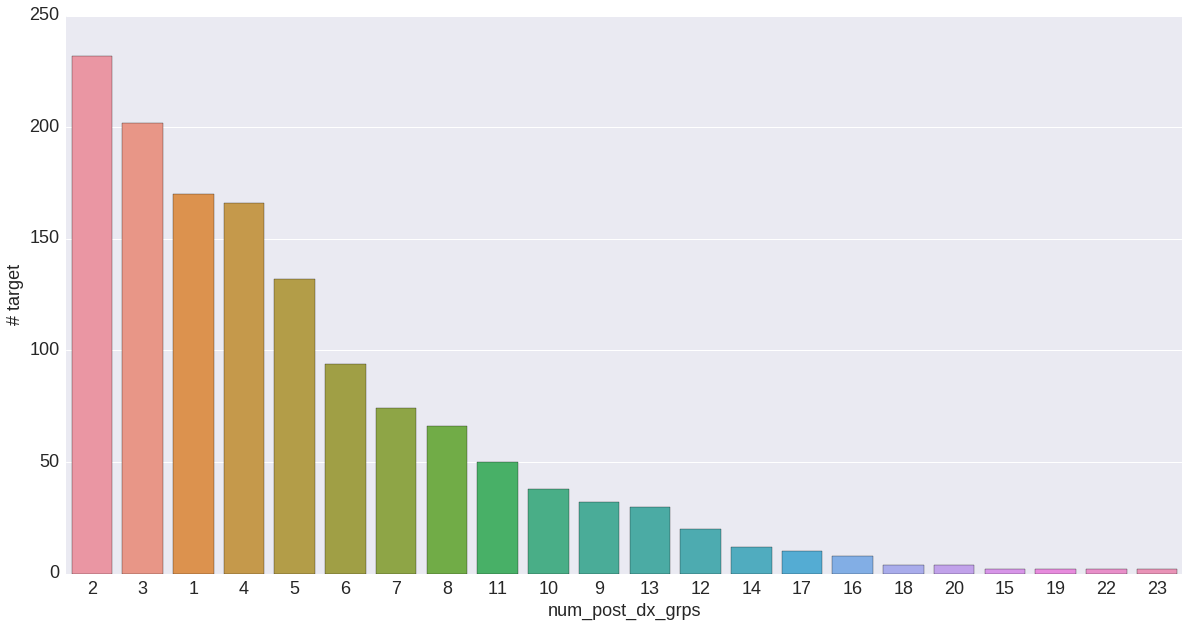

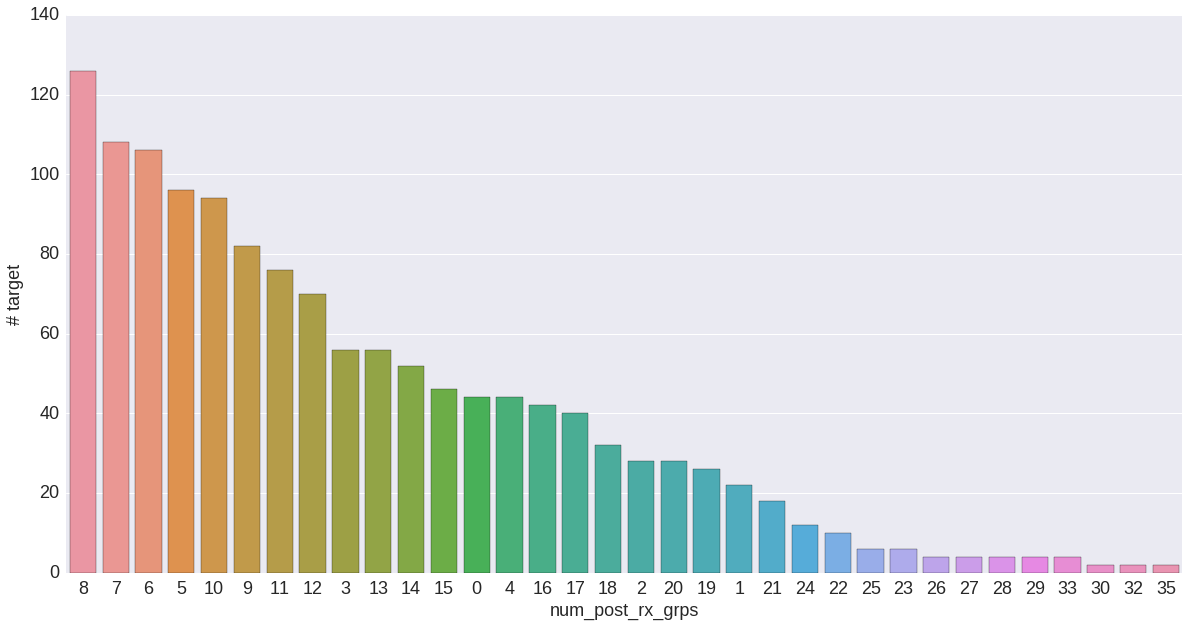

In [284]:
for f in var:
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = df2[[f, 'compl?']].groupby(list(df2[[f]]), as_index=False).sum()
    cat_perc.sort_values(by='compl?', ascending=False, inplace=True)
    x1 = cat_perc.columns[0]
    y1 = cat_perc.columns[1]
    sns.barplot(ax = ax, x = x1, y = y1, data=cat_perc, order=cat_perc[x1])
    plt.ylabel('# target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)

In [285]:
#Insight: We can create bins of the categorical features based on its dictribution on compl? == 1
#Can create groups/range of charges variable based on its dictribution on compl? == 1

# Feature Engineering

In [286]:
#Based on the initial data exploration:
#Step1: Create bins of amount/charges variables -- will do later
#Step2: Combine group variables based on there distribution -- done

In [287]:
charge_var = ['pre_med_charges', 'pre_rx_charges', 'pre_tot_charges', 'tx_med_charges', 'tx_rx_charges', 'tx_tot_charges',
              'post_med_charges', 'post_rx_charges', 'post_tot_charges']

In [288]:
for i in charge_var:
    print(i, ' --->  min: ', min(df[i].values), '  max: ', max(df[i].values))

pre_med_charges  --->  min:  0   max:  1738372
pre_rx_charges  --->  min:  0   max:  110013
pre_tot_charges  --->  min:  0   max:  1739734
tx_med_charges  --->  min:  0   max:  1139746
tx_rx_charges  --->  min:  0   max:  78093
tx_tot_charges  --->  min:  0   max:  1140263
post_med_charges  --->  min:  0   max:  14
post_rx_charges  --->  min:  0   max:  144999
post_tot_charges  --->  min:  0   max:  1277565


In [289]:
df[charge_var].describe()

,pre_med_charges,pre_rx_charges,pre_tot_charges,tx_med_charges,tx_rx_charges,tx_tot_charges,post_med_charges,post_rx_charges,post_tot_charges
count,7.361200e+04,73612.000000,7.361200e+04,7.361200e+04,73612.000000,7.361200e+04,73612.000000,73612.000000,7.361200e+04
mean,5.916940e+03,990.995789,6.907917e+03,9.252117e+03,1409.735424,1.066182e+04,7.426235,2099.757730,1.190630e+04
std,2.342129e+04,1939.161181,2.377542e+04,2.715653e+04,1980.405041,2.755036e+04,2.389628,3095.440734,3.397094e+04
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,3.800000e+02,55.000000,7.330000e+02,9.070000e+02,448.000000,1.832000e+03,7.000000,569.000000,1.909000e+03
50%,1.091000e+03,457.000000,1.973000e+03,2.101500e+03,981.000000,3.538000e+03,8.000000,1425.000000,4.102000e+03
75%,3.813000e+03,1289.000000,5.222000e+03,6.409000e+03,1794.000000,8.259000e+03,9.000000,2680.000000,9.509000e+03
max,1.738372e+06,110013.000000,1.739734e+06,1.139746e+06,78093.000000,1.140263e+06,14.000000,144999.000000,1.277565e+06


In [290]:
#Binning of Group variables

var_grp = ['num_pre_dx_grps','num_pre_rx_grps','num_tx_dx_grps','num_tx_rx_grps','num_post_dx_grps','num_post_rx_grps']

In [291]:
df2 = df

In [292]:
df2['num_pre_dx_grps_bin'] = pd.cut(df2.num_pre_dx_grps, [0, 1, 3, 5, 10], include_lowest=True)
df2['num_pre_rx_grps_bin'] = pd.cut(df2.num_pre_rx_grps, [0,5, 10, 15, 20], include_lowest=True)
df2['num_tx_dx_grps_bin'] = pd.cut(df2.num_tx_dx_grps, [0, 2, 5, 10], include_lowest=True)
df2['num_tx_rx_grps_bin'] = pd.cut(df2.num_tx_rx_grps, [0,5, 10, 15, 20], include_lowest=True)
df2['num_post_dx_grps_bin'] = pd.cut(df2.num_post_dx_grps, [0,2, 5, 10, 15], include_lowest=True)
df2['num_post_rx_grps_bin'] = pd.cut(df2.num_post_rx_grps, [0,5, 10, 15, 20, 25], include_lowest=True)

In [293]:
df2.columns

Index(['ID', 'GDR', 'yrdob', 'agegrp', 'state', 'cregion', 'iyear', 'tx_b',
       'tx_bs', 'tx_s', 'tx_z', 'tx_bz', 'tx_bd', 'tx_bsz', 'tx_bs_plus',
       'tx_bz_plus', 'tx_sz', 'tx_d', 'tx_oth', 'tx_b_plus', 'tx_p', 'tx_bp',
       'tx_life', 'num_pre_dx_grps', 'num_pre_rx_grps', 'num_tx_dx_grps',
       'num_tx_rx_grps', 'num_post_dx_grps', 'num_post_rx_grps',
       'pre_med_charges', 'pre_rx_charges', 'pre_tot_charges',
       'tx_med_charges', 'tx_rx_charges', 'tx_tot_charges', 'post_med_charges',
       'post_rx_charges', 'post_tot_charges', 'compl?', 'Flag',
       'num_pre_dx_grps_bin', 'num_pre_rx_grps_bin', 'num_tx_dx_grps_bin',
       'num_tx_rx_grps_bin', 'num_post_dx_grps_bin', 'num_post_rx_grps_bin'],
      dtype='object')

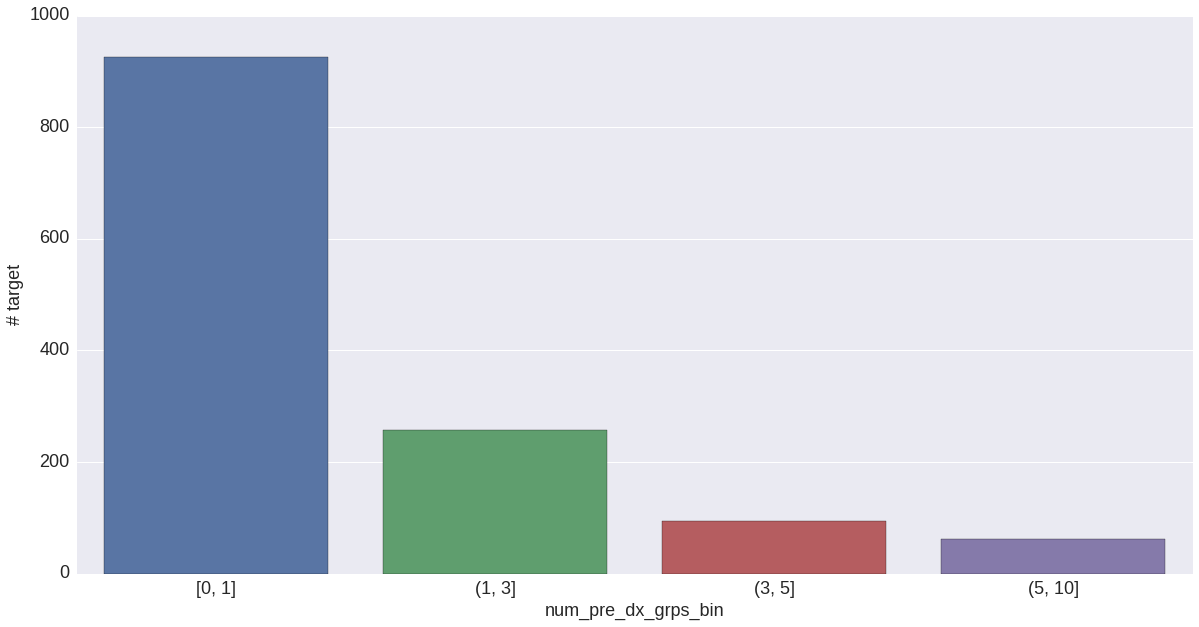

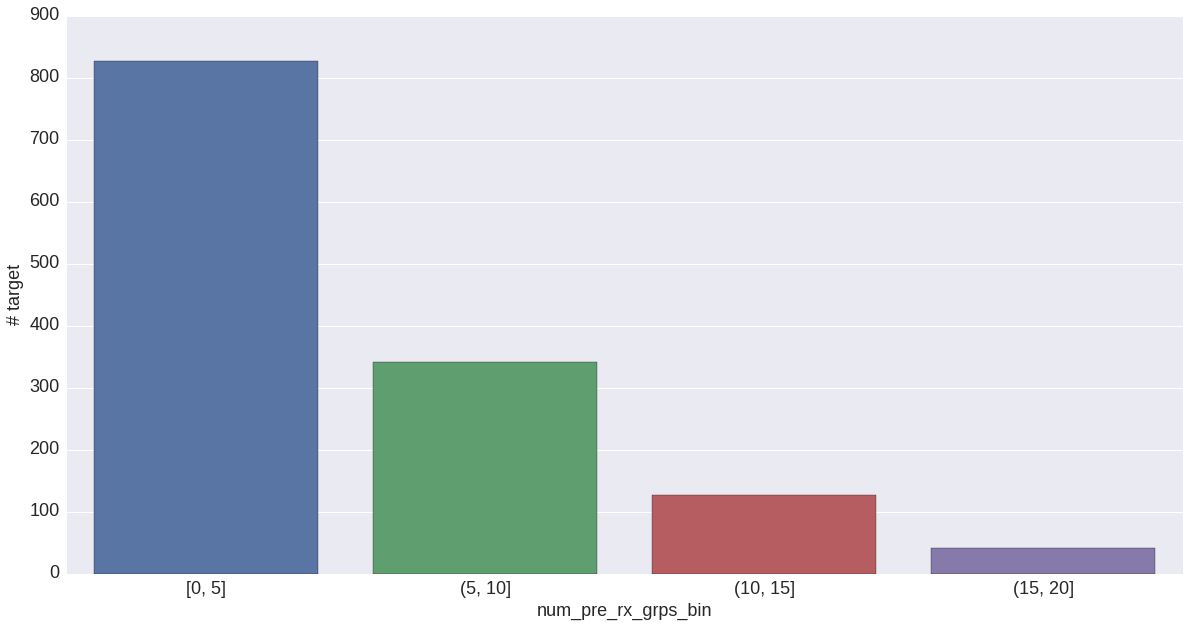

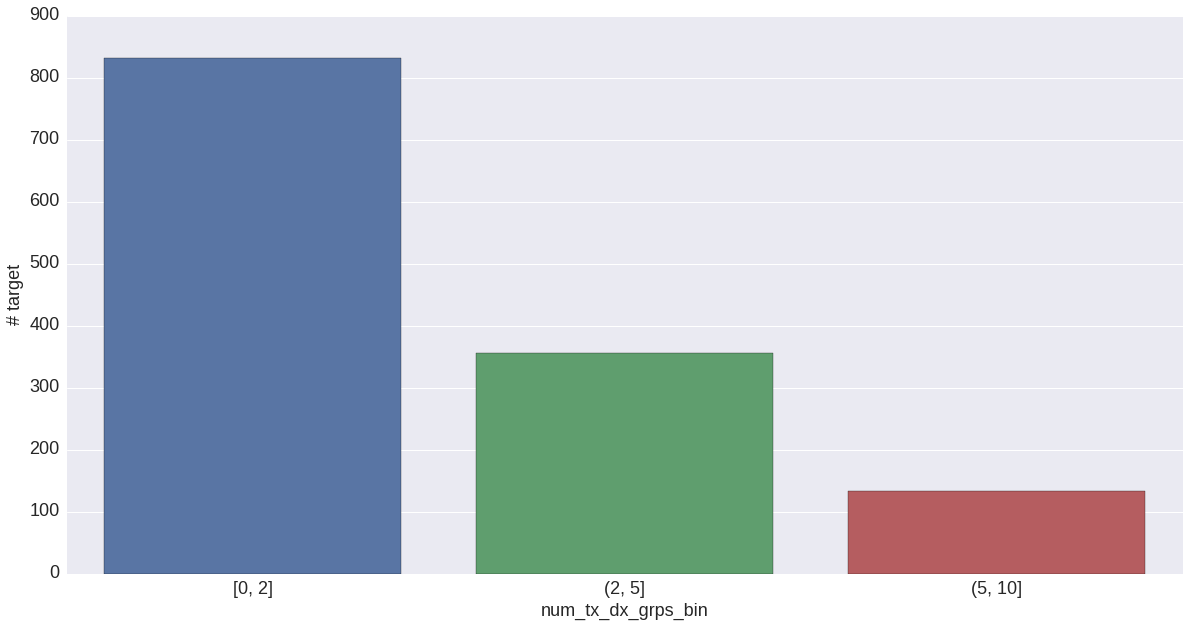

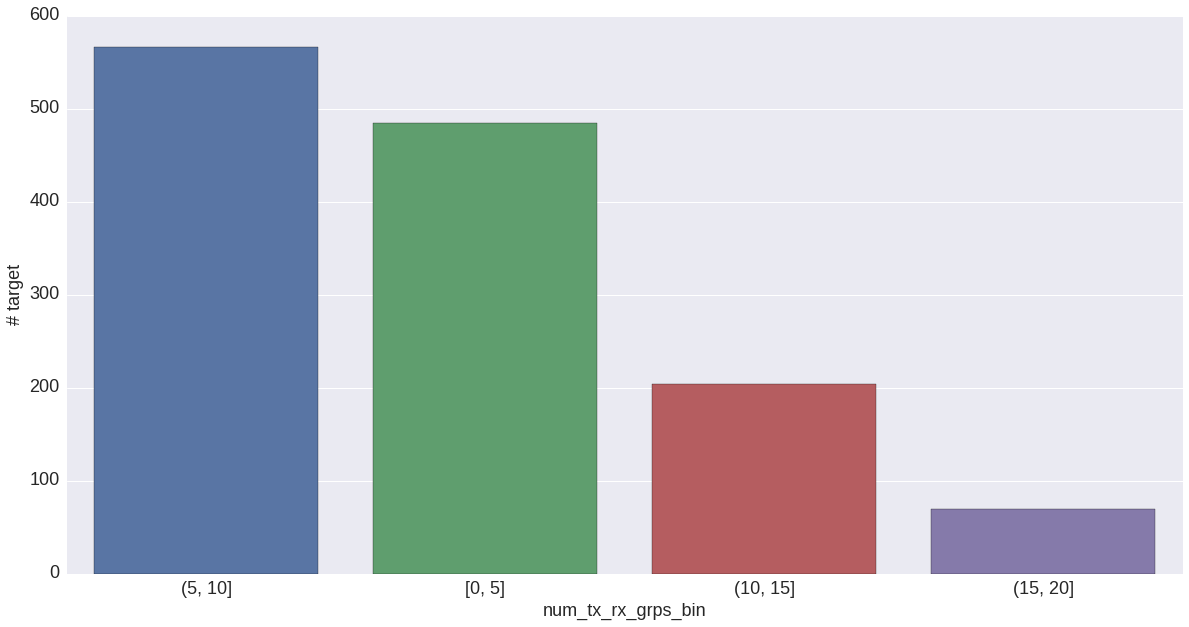

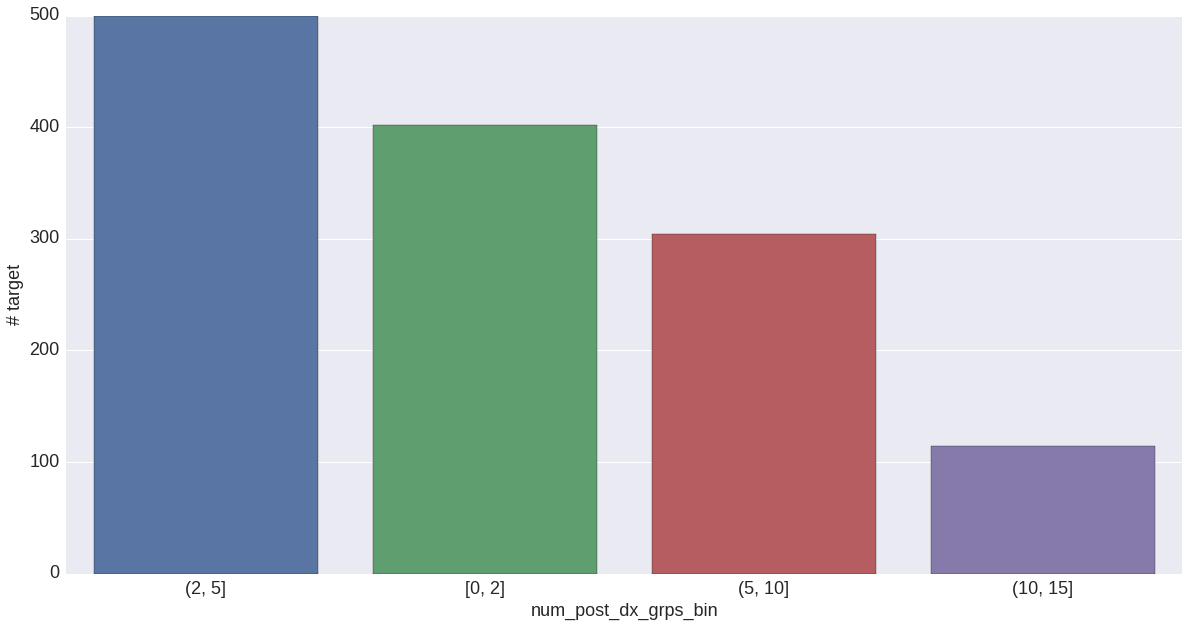

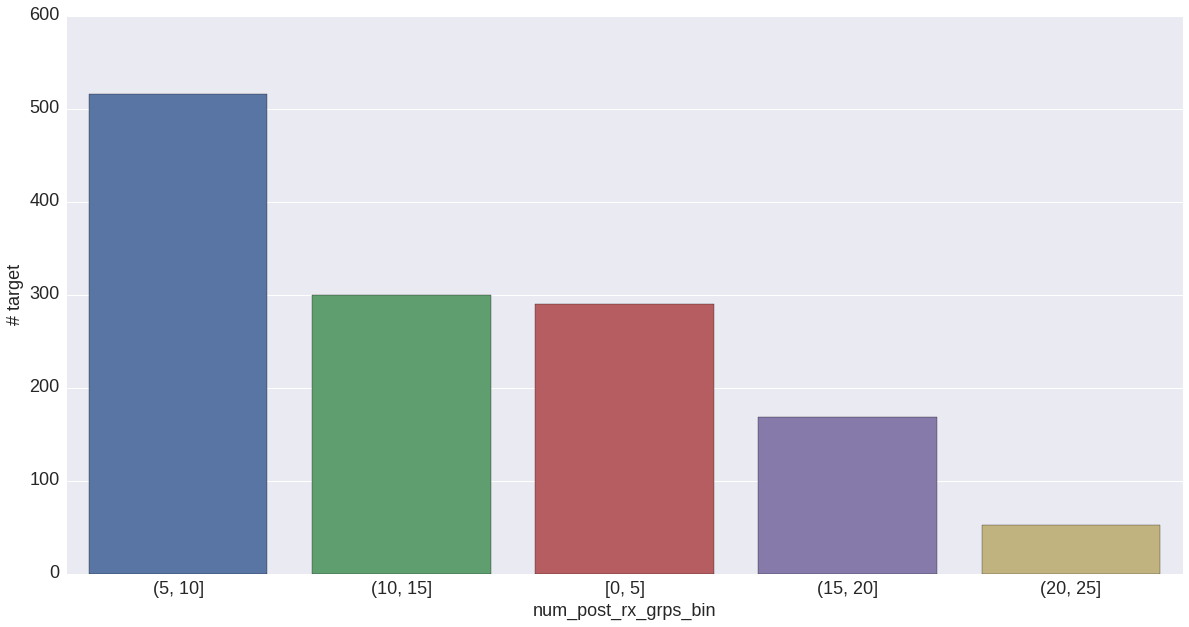

In [294]:
#Checking correlation of bins variables with compl? == 1
var = ['num_pre_dx_grps_bin',
       'num_pre_rx_grps_bin', 'num_tx_dx_grps_bin', 'num_tx_rx_grps_bin',
       'num_post_dx_grps_bin', 'num_post_rx_grps_bin']

for f in var:
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = df2[[f, 'compl?']].groupby(list(df2[[f]]), as_index=False).sum()
    cat_perc.sort_values(by='compl?', ascending=False, inplace=True)
    x1 = cat_perc.columns[0]
    y1 = cat_perc.columns[1]
    sns.barplot(ax = ax, x = x1, y = y1, data=cat_perc, order=cat_perc[x1])
    plt.ylabel('# target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)

In [295]:
#Removing original groups variable

df3 = df2.drop(['num_pre_dx_grps','num_pre_rx_grps','num_tx_dx_grps','num_tx_rx_grps','num_post_dx_grps','num_post_rx_grps'], axis=1)

#Removing State Columns as we are having regions

df3 = df3.drop(['state', 'ID'], axis=1)


In [296]:
df3.columns

Index(['GDR', 'yrdob', 'agegrp', 'cregion', 'iyear', 'tx_b', 'tx_bs', 'tx_s',
       'tx_z', 'tx_bz', 'tx_bd', 'tx_bsz', 'tx_bs_plus', 'tx_bz_plus', 'tx_sz',
       'tx_d', 'tx_oth', 'tx_b_plus', 'tx_p', 'tx_bp', 'tx_life',
       'pre_med_charges', 'pre_rx_charges', 'pre_tot_charges',
       'tx_med_charges', 'tx_rx_charges', 'tx_tot_charges', 'post_med_charges',
       'post_rx_charges', 'post_tot_charges', 'compl?', 'Flag',
       'num_pre_dx_grps_bin', 'num_pre_rx_grps_bin', 'num_tx_dx_grps_bin',
       'num_tx_rx_grps_bin', 'num_post_dx_grps_bin', 'num_post_rx_grps_bin'],
      dtype='object')

In [297]:
df3.shape

(73612, 38)

In [298]:
#Dummification of categorical features

In [299]:
cat = ['GDR','yrdob','agegrp','cregion','iyear',
    'num_pre_dx_grps_bin','num_pre_rx_grps_bin','num_tx_dx_grps_bin','num_tx_rx_grps_bin',
       'num_post_dx_grps_bin','num_post_rx_grps_bin']



In [300]:
print('Before dummification we have {} variables in train'.format(df3.shape[1]))
df4 = pd.get_dummies(df3, columns=cat, drop_first=True)
print('After dummification we have {} variables in train'.format(df4.shape[1]))

Before dummification we have 38 variables in train
After dummification we have 121 variables in train


In [301]:
df4.head()

,tx_b,tx_bs,tx_s,tx_z,tx_bz,tx_bd,tx_bsz,tx_bs_plus,tx_bz_plus,tx_sz,...,"num_tx_rx_grps_bin_(5, 10]","num_tx_rx_grps_bin_(10, 15]","num_tx_rx_grps_bin_(15, 20]","num_post_dx_grps_bin_(2, 5]","num_post_dx_grps_bin_(5, 10]","num_post_dx_grps_bin_(10, 15]","num_post_rx_grps_bin_(5, 10]","num_post_rx_grps_bin_(10, 15]","num_post_rx_grps_bin_(15, 20]","num_post_rx_grps_bin_(20, 25]"
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0,0,0,0,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [302]:
df4.shape

(73612, 121)

# Feature Scaling

In [303]:
from sklearn.preprocessing import StandardScaler

In [304]:
scaler = StandardScaler()
df5 = pd.DataFrame(scaler.fit_transform(df4.drop(['compl?', 'Flag'], axis=1)), columns=df4.drop(['compl?', 'Flag'], axis=1).columns)

In [305]:
#df5.shape
df4 = df4.reset_index()
#df4[df4.index.duplicated()]

In [306]:
df5['compl?'] = df4['compl?'].astype('int')
df5['Flag'] = df4['Flag']
#df4['compl?']

#df4[df4.index.duplicated()]

In [307]:
df5.shape

(73612, 121)

In [308]:
#Splitting Test and Train files based on flag

df_Train = df5[df5['Flag'] == 'Train']
df_Test = df5[df5['Flag'] == 'Test']

In [309]:
df_Train.shape, df_Test.shape

((36806, 121), (36806, 121))

In [310]:
df_Train = df_Train.drop(['Flag'], axis=1)
df_Test = df_Test.drop(['Flag'], axis=1)

In [311]:
df_Test.shape, df_Train.shape

((36806, 120), (36806, 120))

# Train Test Split

In [312]:
#Splitting
X_train, X_test, y_train, y_test = train_test_split(df_Train.drop(['compl?'], axis=1),
                                                    df_Train['compl?'].astype(int), test_size=0.30, random_state=101)

In [313]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(25764, 119) (11042, 119) (25764,) (11042,)


# Upsampling/Downsampling

In [314]:
df_train_temp = X_train
df_train_temp['compl?'] = y_train

In [315]:
df_train_temp['compl?'].value_counts()

0    25298
1      466
Name: compl?, dtype: int64

In [316]:
'''
Upsampling

----10%---
Total - 27874
0 - 25298
1 - 2576
'''

'\nUpsampling\n\n----10%---\nTotal - 27874\n0 - 25298\n1 - 2576\n'

In [317]:
#Upsampling 10%

from sklearn.utils import resample

df_majority = df_train_temp[df_train_temp['compl?']==0]
df_minority = df_train_temp[df_train_temp['compl?']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2576,    # to match majority class 10% of majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled_10 = pd.concat([df_majority, df_minority_upsampled])
 

X_train_upsampled_10 = df_upsampled_10.drop(['compl?'], axis=1)
y_train_upsampled_10 = df_upsampled_10['compl?']

# Display new class counts
df_upsampled_10['compl?'].value_counts()

0    25298
1     2576
Name: compl?, dtype: int64

In [318]:
df_upsampled_10['compl?'].value_counts()

0    25298
1     2576
Name: compl?, dtype: int64

In [319]:
'''
Upsampling

----25%---
Total - 31742
0 - 25298
1 - 6444
'''

'\nUpsampling\n\n----25%---\nTotal - 31742\n0 - 25298\n1 - 6444\n'

In [320]:
#Upsampling 25%

from sklearn.utils import resample

df_majority = df_train_temp[df_train_temp['compl?']==0]
df_minority = df_train_temp[df_train_temp['compl?']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=6444,    # to match majority class 10% of majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled_25 = pd.concat([df_majority, df_minority_upsampled])

X_train_upsampled_25 = df_upsampled_25.drop(['compl?'], axis=1)
y_train_upsampled_25 = df_upsampled_25['compl?']

# Display new class counts
df_upsampled_25['compl?'].value_counts()

0    25298
1     6444
Name: compl?, dtype: int64

In [321]:
'''
Downsampling

----25%---
Total - 25764
0 - 12649
1 - 466

'''

'\nDownsampling\n\n----25%---\nTotal - 25764\n0 - 12649\n1 - 466\n\n'

In [322]:
#Downsampling 50%

from sklearn.utils import resample

df_majority = df_train_temp[df_train_temp['compl?']==0]
df_minority = df_train_temp[df_train_temp['compl?']==1]
 
# Downsampling majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=12649,    # to match majority class 10% of majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with Downsampling majority class
df_downsampled_50 = pd.concat([df_minority, df_majority_downsampled])

X_train_downsampled_50 = df_downsampled_50.drop(['compl?'], axis=1)
y_train_downsampled_50 = df_downsampled_50['compl?']

# Display new class counts
df_downsampled_50['compl?'].value_counts()

0    12649
1      466
Name: compl?, dtype: int64

In [323]:
df_downsampled_50.shape

(13115, 120)

In [324]:
'''
Downsampling

----75%---
Total - 6790
0 - 6324
1 - 466

'''

'\nDownsampling\n\n----75%---\nTotal - 6790\n0 - 6324\n1 - 466\n\n'

In [325]:
#Downsampling 75%

from sklearn.utils import resample

df_majority = df_train_temp[df_train_temp['compl?']==0]
df_minority = df_train_temp[df_train_temp['compl?']==1]
 
# Downsampling majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=6324,    # to match majority class 10% of majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with Downsampling majority class
df_downsampled_75 = pd.concat([df_minority, df_majority_downsampled])

X_train_downsampled_75 = df_downsampled_75.drop(['compl?'], axis=1)
y_train_downsampled_75 = df_downsampled_75['compl?']

# Display new class counts
df_downsampled_75['compl?'].value_counts()

0    6324
1     466
Name: compl?, dtype: int64

In [326]:
df_downsampled_75.shape

(6790, 120)

In [327]:
'''
Upsampling(10%) + Downsampling(50%)
Total - 15225
0 - 12649
1 - 2576

'''

'\nUpsampling(10%) + Downsampling(50%)\nTotal - 15225\n0 - 12649\n1 - 2576\n\n'

In [328]:
#Upsampling 10% - Downsampling 50%

from sklearn.utils import resample

df_majority = df_train_temp[df_train_temp['compl?']==0]
df_minority = df_train_temp[df_train_temp['compl?']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=2576,    # to match majority class 10% of majority class
                                 random_state=123) # reproducible results

# Downsampling majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=12649,    # to match majority class 10% of majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_updownsampled_10_50 = pd.concat([df_minority_upsampled, df_majority_downsampled])

X_train_updownsampled_10_50 = df_updownsampled_10_50.drop(['compl?'], axis=1)
y_train_updownsampled_10_50 = df_updownsampled_10_50['compl?']

# Display new class counts
df_updownsampled_10_50['compl?'].value_counts()

0    12649
1     2576
Name: compl?, dtype: int64

In [329]:
df_updownsampled_10_50.shape

(15225, 120)

In [330]:
'''
Upsampling(15%) + Downsampling(30%)

Total - 15225
0 - 17708
1 - 3864

'''

'\nUpsampling(15%) + Downsampling(30%)\n\nTotal - 15225\n0 - 17708\n1 - 3864\n\n'

In [331]:
#Upsampling 15% - Downsampling 30%

from sklearn.utils import resample

df_majority = df_train_temp[df_train_temp['compl?']==0]
df_minority = df_train_temp[df_train_temp['compl?']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=3864,    # to match majority class 10% of majority class
                                 random_state=123) # reproducible results

# Downsampling majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=17708,    # to match majority class 10% of majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_updownsampled_15_30 = pd.concat([df_minority_upsampled, df_majority_downsampled])

X_train_updownsampled_15_30 = df_updownsampled_15_30.drop(['compl?'], axis=1)
y_train_updownsampled_15_30 = df_updownsampled_15_30['compl?']

# Display new class counts
df_updownsampled_15_30['compl?'].value_counts()

0    17708
1     3864
Name: compl?, dtype: int64

# ML Model

In [332]:
X_train = X_train.drop(['compl?'], axis=1)

In [333]:
y_test.shape

(11042,)

In [334]:
#Logistic Regression

lm1 = LogisticRegression(class_weight='balanced', C=2)
lm2 = LogisticRegression(class_weight='balanced', C=2)
lm3 = LogisticRegression(class_weight='balanced', C=2)
lm4 = LogisticRegression(class_weight='balanced', C=2)
lm5 = LogisticRegression(class_weight='balanced', C=2)
lm6 = LogisticRegression(class_weight='balanced', C=2)
lm7 = LogisticRegression(class_weight='balanced', C=2)

logistic_model_test_train = lm1.fit(X_train, y_train)
logistic_model_upsampled_10 = lm2.fit(X_train_upsampled_10, y_train_upsampled_10)
logistic_model_upsampled_25 = lm3.fit(X_train_upsampled_25, y_train_upsampled_25)
logistic_model_downsampled_50 = lm4.fit(X_train_downsampled_50, y_train_downsampled_50)
logistic_model_downsampled_75 = lm5.fit(X_train_downsampled_75, y_train_downsampled_75)
logistic_model_updownsampled_15_30 = lm6.fit(X_train_updownsampled_15_30, y_train_updownsampled_15_30)
logistic_model_updownsampled_10_50 = lm7.fit(X_train_updownsampled_10_50, y_train_updownsampled_10_50)


predictions_LM_test_train = logistic_model_test_train.predict(X_test)
predictions_LM_upsampled_10 = logistic_model_upsampled_10.predict(X_test)
predictions_LM_upsampled_25 = logistic_model_upsampled_25.predict(X_test)
predictions_LM_downsampled_50 = logistic_model_downsampled_50.predict(X_test)
predictions_LM_downsampled_75 = logistic_model_downsampled_75.predict(X_test)
predictions_LM_updownsampled_15_30 = logistic_model_updownsampled_15_30.predict(X_test)
predictions_LM_updownsampled_15_30 = logistic_model_updownsampled_10_50.predict(X_test)

log = [predictions_LM_test_train, predictions_LM_upsampled_10, predictions_LM_upsampled_25, predictions_LM_downsampled_50,
      predictions_LM_downsampled_75, predictions_LM_updownsampled_15_30, predictions_LM_updownsampled_15_30 ]
name = ['test_train', 'upsampled_10', 'upsampled_25', 'downsampled_50',
      'downsampled_75', 'updownsampled_15_30', 'updownsampled_15_30' ]

print("Printing the results of Logistic Regression: ")

for i,j in zip(log, name):
    print("\n\nResults of : ", j, '\n')
    print('Classification Report of Logistic Regression with : ', j)
    print(classification_report(y_test,i))

    print('Confusion Matrix Logistic Regression : ')
    print(confusion_matrix(y_test,i))

    conf = confusion_matrix(y_test,i)
    Sensitivity = conf[1][1]/(conf[1][0] + conf[1][1])
    print('\nSensitivity in Logistic Regression with :', Sensitivity)
    #roc_auc_score(y_test, i)
    print('\n ROC-AUC curve: ', roc_auc_score(y_test, i))



Printing the results of Logistic Regression: 


Results of :  test_train 

Classification Report of Logistic Regression with :  test_train
             precision    recall  f1-score   support

          0       0.99      0.77      0.87     10832
          1       0.05      0.65      0.10       210

avg / total       0.97      0.77      0.85     11042

Confusion Matrix Logistic Regression : 
[[8339 2493]
 [  73  137]]

Sensitivity in Logistic Regression with : 0.652380952381

 ROC-AUC curve:  0.711114774566


Results of :  upsampled_10 

Classification Report of Logistic Regression with :  upsampled_10
             precision    recall  f1-score   support

          0       0.99      0.78      0.87     10832
          1       0.05      0.63      0.10       210

avg / total       0.97      0.77      0.86     11042

Confusion Matrix Logistic Regression : 
[[8408 2424]
 [  77  133]]

Sensitivity in Logistic Regression with : 0.633333333333

 ROC-AUC curve:  0.704775972427


Results of :  up

In [335]:
#Decision Tree


dc1 = DecisionTreeClassifier(class_weight='balanced', max_depth=20, min_samples_split=3, min_samples_leaf=3, random_state=0 )
dc2 = DecisionTreeClassifier(class_weight='balanced', max_depth=20, min_samples_split=3, min_samples_leaf=3, random_state=0)
dc3 = DecisionTreeClassifier(class_weight='balanced', max_depth=20, min_samples_split=3, min_samples_leaf=3, random_state=0)
dc4 = DecisionTreeClassifier(class_weight='balanced', max_depth=20, min_samples_split=3, min_samples_leaf=3, random_state=0)
dc5 = DecisionTreeClassifier(class_weight='balanced', max_depth=20, min_samples_split=3, min_samples_leaf=3, random_state=0)
dc6 = DecisionTreeClassifier(class_weight='balanced', max_depth=20, min_samples_split=3, min_samples_leaf=3, random_state=0)
dc7 = DecisionTreeClassifier(class_weight='balanced', max_depth=20, min_samples_split=3, min_samples_leaf=3, random_state=0)

#decision_tree_model = dc.fit(X_train, y_train)
decision_tree_test_train = dc1.fit(X_train, y_train)
decision_tree_upsampled_10 = dc2.fit(X_train_upsampled_10, y_train_upsampled_10)
decision_tree_upsampled_25 = dc3.fit(X_train_upsampled_25, y_train_upsampled_25)
decision_tree_downsampled_50 = dc4.fit(X_train_downsampled_50, y_train_downsampled_50)
decision_tree_downsampled_75 = dc5.fit(X_train_downsampled_75, y_train_downsampled_75)
decision_tree_updownsampled_15_30 = dc6.fit(X_train_updownsampled_15_30, y_train_updownsampled_15_30)
decision_tree_updownsampled_10_50 = dc7.fit(X_train_updownsampled_10_50, y_train_updownsampled_10_50)


predictions_DT_test_train = decision_tree_test_train.predict(X_test)
predictions_DT_upsampled_10 = decision_tree_upsampled_10.predict(X_test)
predictions_DT_upsampled_25 = decision_tree_upsampled_25.predict(X_test)
predictions_DT_downsampled_50 = decision_tree_downsampled_50.predict(X_test)
predictions_DT_downsampled_75 = decision_tree_downsampled_75.predict(X_test)
predictions_DT_updownsampled_15_30 = decision_tree_updownsampled_15_30.predict(X_test)
predictions_DT_updownsampled_10_50 = decision_tree_updownsampled_10_50.predict(X_test)

log = [predictions_DT_test_train, predictions_DT_upsampled_10, predictions_DT_upsampled_25, predictions_DT_downsampled_50,
      predictions_DT_downsampled_75, predictions_DT_updownsampled_15_30, predictions_DT_updownsampled_10_50 ]
name = ['test_train', 'upsampled_10', 'upsampled_25', 'downsampled_50',
      'downsampled_75', 'updownsampled_15_30', 'updownsampled_15_30' ]

print("Printing the results of Decision Tree: ")

for i,j in zip(log, name):
    print("\n\nResults of : ", j, '\n')
    print('Classification Report of Decision Tree with : ', j)
    print(classification_report(y_test,i))

    print('Confusion Matrix Decision Tree : ')
    print(confusion_matrix(y_test,i))

    conf = confusion_matrix(y_test,i)
    Sensitivity = conf[1][1]/(conf[1][0] + conf[1][1])
    print('\nSensitivity in Decision Tree with :', Sensitivity)
    print('\n ROC-AUC curve: ', roc_auc_score(y_test, i))



Printing the results of Decision Tree: 


Results of :  test_train 

Classification Report of Decision Tree with :  test_train
             precision    recall  f1-score   support

          0       0.98      0.90      0.94     10832
          1       0.04      0.23      0.07       210

avg / total       0.97      0.88      0.92     11042

Confusion Matrix Decision Tree : 
[[9717 1115]
 [ 161   49]]

Sensitivity in Decision Tree with : 0.233333333333

 ROC-AUC curve:  0.565198793698


Results of :  upsampled_10 

Classification Report of Decision Tree with :  upsampled_10
             precision    recall  f1-score   support

          0       0.98      0.93      0.96     10832
          1       0.06      0.21      0.09       210

avg / total       0.97      0.92      0.94     11042

Confusion Matrix Decision Tree : 
[[10061   771]
 [  165    45]]

Sensitivity in Decision Tree with : 0.214285714286

 ROC-AUC curve:  0.571553861574


Results of :  upsampled_25 

Classification Report of 

In [336]:
#Parameters optimized using Randomized Search CV
#Random Forest

rf1 = RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_split=6, min_samples_leaf=6, random_state=0, criterion='gini')
rf2 = RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_split=6, min_samples_leaf=6, random_state=0, criterion='gini')
rf3 = RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_split=6, min_samples_leaf=6, random_state=0, criterion='gini')
rf4 = RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_split=6, min_samples_leaf=6, random_state=0, criterion='gini')
rf5 = RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_split=6, min_samples_leaf=6, random_state=0, criterion='gini')
rf6 = RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_split=6, min_samples_leaf=6, random_state=0, criterion='gini')
rf7 = RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_split=6, min_samples_leaf=6, random_state=0, criterion='gini')


#decision_tree_model = dc.fit(X_train, y_train)
random_forest_test_train = rf1.fit(X_train, y_train)
random_forest_upsampled_10 = rf2.fit(X_train_upsampled_10, y_train_upsampled_10)
random_forest_upsampled_25 = rf3.fit(X_train_upsampled_25, y_train_upsampled_25)
random_forest_downsampled_50 = rf4.fit(X_train_downsampled_50, y_train_downsampled_50)
random_forest_downsampled_75 = rf5.fit(X_train_downsampled_75, y_train_downsampled_75)
random_forest_updownsampled_15_30 = rf6.fit(X_train_updownsampled_15_30, y_train_updownsampled_15_30)
random_forest_updownsampled_10_50 = rf7.fit(X_train_updownsampled_10_50, y_train_updownsampled_10_50)


predictions_RF_test_train = random_forest_test_train.predict(X_test)
predictions_RF_upsampled_10 = random_forest_upsampled_10.predict(X_test)
predictions_RF_upsampled_25 = random_forest_upsampled_25.predict(X_test)
predictions_RF_downsampled_50 = random_forest_downsampled_50.predict(X_test)
predictions_RF_downsampled_75 = random_forest_downsampled_75.predict(X_test)
predictions_RF_updownsampled_15_30 = random_forest_updownsampled_15_30.predict(X_test)
predictions_RF_updownsampled_10_50 = random_forest_updownsampled_10_50.predict(X_test)

log = [predictions_RF_test_train, predictions_RF_upsampled_10, predictions_RF_upsampled_25, predictions_RF_downsampled_50,
      predictions_RF_downsampled_75, predictions_RF_updownsampled_15_30, predictions_RF_updownsampled_10_50 ]
name = ['test_train', 'upsampled_10', 'upsampled_25', 'downsampled_50',
      'downsampled_75', 'updownsampled_15_30', 'updownsampled_15_30' ]

print("Printing the results of Random Forest: ")

for i,j in zip(log, name):
    print("\n\nResults of : ", j, '\n')
    print('Classification Report of Random Forest with : ', j)
    print(classification_report(y_test,i))

    print('Confusion Matrix Random Forest : ')
    print(confusion_matrix(y_test,i))

    conf = confusion_matrix(y_test,i)
    Sensitivity = conf[1][1]/(conf[1][0] + conf[1][1])
    print('\nSensitivity in Random Forest with :', Sensitivity)
    print('\n ROC-AUC curve: ', roc_auc_score(y_test, i))



Printing the results of Random Forest: 


Results of :  test_train 

Classification Report of Random Forest with :  test_train
             precision    recall  f1-score   support

          0       0.99      0.75      0.86     10832
          1       0.05      0.60      0.08       210

avg / total       0.97      0.75      0.84     11042

Confusion Matrix Random Forest : 
[[8164 2668]
 [  84  126]]

Sensitivity in Random Forest with : 0.6

 ROC-AUC curve:  0.676846381093


Results of :  upsampled_10 

Classification Report of Random Forest with :  upsampled_10
             precision    recall  f1-score   support

          0       0.99      0.77      0.87     10832
          1       0.05      0.58      0.09       210

avg / total       0.97      0.77      0.85     11042

Confusion Matrix Random Forest : 
[[8383 2449]
 [  88  122]]

Sensitivity in Random Forest with : 0.580952380952

 ROC-AUC curve:  0.677431508054


Results of :  upsampled_25 

Classification Report of Random Forest w

In [337]:
from sklearn.ensemble import GradientBoostingClassifier

In [338]:
#Parameters optimized using Randomized Search CV
#Gradient Boosting


GB1 = GradientBoostingClassifier(learning_rate=.1, n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_depth=14)
GB2 = GradientBoostingClassifier(learning_rate=.1, n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_depth=14)
GB3 = GradientBoostingClassifier(learning_rate=.1, n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_depth=14)
GB4 = GradientBoostingClassifier(learning_rate=.1, n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_depth=14)
GB5 = GradientBoostingClassifier(learning_rate=.1, n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_depth=14)
GB6 = GradientBoostingClassifier(learning_rate=.1, n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_depth=14)
GB7 = GradientBoostingClassifier(learning_rate=.1, n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_depth=14)


#decision_tree_model = dc.fit(X_train, y_train)
gradient_boosting_test_train = GB1.fit(X_train, y_train)
gradient_boosting_upsampled_10 = GB2.fit(X_train_upsampled_10, y_train_upsampled_10)
gradient_boosting_upsampled_25 = GB3.fit(X_train_upsampled_25, y_train_upsampled_25)
gradient_boosting_downsampled_50 = GB4.fit(X_train_downsampled_50, y_train_downsampled_50)
gradient_boosting_downsampled_75 = GB5.fit(X_train_downsampled_75, y_train_downsampled_75)
gradient_boosting_updownsampled_15_30 = GB6.fit(X_train_updownsampled_15_30, y_train_updownsampled_15_30)
gradient_boosting_updownsampled_10_50 = GB7.fit(X_train_updownsampled_10_50, y_train_updownsampled_10_50)


predictions_GB_test_train = gradient_boosting_test_train.predict(X_test)
predictions_GB_upsampled_10 = gradient_boosting_upsampled_10.predict(X_test)
predictions_GB_upsampled_25 = gradient_boosting_upsampled_25.predict(X_test)
predictions_GB_downsampled_50 = gradient_boosting_downsampled_50.predict(X_test)
predictions_GB_downsampled_75 = gradient_boosting_downsampled_75.predict(X_test)
predictions_GB_updownsampled_15_30 = gradient_boosting_updownsampled_15_30.predict(X_test)
predictions_GB_updownsampled_10_50 = gradient_boosting_updownsampled_10_50.predict(X_test)

log = [predictions_GB_test_train, predictions_GB_upsampled_10, predictions_GB_upsampled_25, predictions_GB_downsampled_50,
      predictions_GB_downsampled_75, predictions_GB_updownsampled_15_30, predictions_GB_updownsampled_10_50 ]
name = ['test_train', 'upsampled_10', 'upsampled_25', 'downsampled_50',
      'downsampled_75', 'updownsampled_15_30', 'updownsampled_15_30' ]

print("Printing the results of Gradient Boosting: ")

for i,j in zip(log, name):
    print("\n\nResults of : ", j, '\n')
    print('Classification Report of Gradient Boosting with : ', j)
    print(classification_report(y_test,i))

    print('Confusion Matrix Gradient Boosting : ')
    print(confusion_matrix(y_test,i))

    conf = confusion_matrix(y_test,i)
    Sensitivity = conf[1][1]/(conf[1][0] + conf[1][1])
    print('\nSensitivity in Gradient Boosting with :', Sensitivity)
    print('\n ROC-AUC curve: ', roc_auc_score(y_test, i))



Printing the results of Gradient Boosting: 


Results of :  test_train 

Classification Report of Gradient Boosting with :  test_train
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     10832
          1       0.25      0.02      0.04       210

avg / total       0.97      0.98      0.97     11042

Confusion Matrix Gradient Boosting : 
[[10820    12]
 [  206     4]]

Sensitivity in Gradient Boosting with : 0.0190476190476

 ROC-AUC curve:  0.508969895196


Results of :  upsampled_10 

Classification Report of Gradient Boosting with :  upsampled_10
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     10832
          1       0.22      0.02      0.04       210

avg / total       0.97      0.98      0.97     11042

Confusion Matrix Gradient Boosting : 
[[10814    18]
 [  205     5]]

Sensitivity in Gradient Boosting with : 0.0238095238095

 ROC-AUC curve:  0.511073890413


Results of :  upsamp

# Parameter Tunning

In [222]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
'criterion' : ['gini', 'entropy'],
'splitter' :['best', 'random'],
'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
'min_samples_leaf' : [2, 3, 4, 5, 6],
'class_weight' : ['balanced', None],
'max_leaf_nodes' : [2, 3, 4, 5, 6, 7, 8, 9]

}

In [223]:
tree = RandomizedSearchCV(DecisionTreeClassifier(), param_grid).fit(X_train_upsampled_10, y_train_upsampled_10)

In [224]:
predictions = tree.predict(X_test)

In [225]:
print("\n\nResults of : ", j, '\n')
print('Classification Report of Random Forest with : ', j)
print(classification_report(y_test,predictions))

print('Confusion Matrix Random Forest : ')
print(confusion_matrix(y_test,predictions))

conf = confusion_matrix(y_test,predictions)
Sensitivity = conf[1][1]/(conf[1][0] + conf[1][1])
print('\nSensitivity in Random Forest with :', Sensitivity)




Results of :  updownsampled_15_30 

Classification Report of Random Forest with :  updownsampled_15_30
             precision    recall  f1-score   support

          0       0.98      0.99      0.99     10832
          1       0.24      0.09      0.13       210

avg / total       0.97      0.98      0.97     11042

Confusion Matrix Random Forest : 
[[10772    60]
 [  191    19]]

Sensitivity in Random Forest with : 0.0904761904762


In [226]:
tree.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 4,
 'min_samples_leaf': 6,
 'min_samples_split': 4,
 'splitter': 'random'}

In [237]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
'learning_rate': [0.05, .07, .09, .1, .12, .13], 
'n_estimators' : [100, 150, 200, 250], 
 'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
'min_samples_leaf' : [2, 3, 4, 5, 6], 
 'max_depth' :[3, 4, 5, 7, 8, 10, 12, 14, 15, 17], 
 'max_leaf_nodes' : [2, 3, 4, 5, 6]
}

In [238]:
tree = RandomizedSearchCV(GradientBoostingClassifier(), param_grid).fit(X_train, y_train)

In [239]:
predictions = tree.predict(X_test)

In [240]:
print("\n\nResults of : ", j, '\n')
print('Classification Report of Random Forest with : ', j)
print(classification_report(y_test,predictions))

print('Confusion Matrix Random Forest : ')
print(confusion_matrix(y_test,predictions))

conf = confusion_matrix(y_test,predictions)
Sensitivity = conf[1][1]/(conf[1][0] + conf[1][1])
print('\nSensitivity in Random Forest with :', Sensitivity)




Results of :  updownsampled_15_30 

Classification Report of Random Forest with :  updownsampled_15_30
             precision    recall  f1-score   support

          0       0.98      1.00      0.99     10832
          1       0.00      0.00      0.00       210

avg / total       0.96      0.98      0.97     11042

Confusion Matrix Random Forest : 
[[10832     0]
 [  210     0]]

Sensitivity in Random Forest with : 0.0


In [241]:
tree.best_params_

{'learning_rate': 0.1,
 'max_depth': 14,
 'max_leaf_nodes': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

# Test Data Prediction

In [243]:
df_Test.shape

(36806, 120)

In [244]:
df_Test = df_Test.drop(['compl?'], axis=1)

In [245]:
pred = logistic_model_test_train.predict(df_Test)

In [246]:
df_Test['compl?'] = pred

In [251]:
df= pd.read_excel("diabetes_dataset_insample.xlsx", sheet_name='diabetes_outofsample_dataset')

In [252]:
df = df.drop(['compl?'], axis=1)

In [253]:
df['compl?'] = pred

In [254]:
df.to_csv('Final_Result.csv', index=False)